<a href="https://colab.research.google.com/github/thasniyamansoora/Myy_projects/blob/main/ThasniyaMansoora_Airline_Passenger_Referral_Prediction_capston_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   **Airline Passenger Referral Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** - Thasniya Mansoora




# **Project Summary -**

The Airline passenger Referral system has become the most important criteria globally for the airline industry in order to address the surge which has been created after global pandemic so as to remain in the global market competition. Airline referral system generally works on customer reviews which is basically sentiment given by the customer depending upon various factor like seat comfort, their trip distance, route they have travelled, timing, the airline frequency, ground service etc. on the basis of which sentiment reviews are analysed and machine learning model on classification is prepared which helps airline industries to focus on the factor resolving which it can actually help them in business growth better than the competitors

# **GitHub Link -**

https://github.com/thasniyamansoora/Airline-reviews-classification

# **Problem Statement**


Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import datetime as dt


from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb


In [ ]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
# Reading the xlsx file from the drive
df = pd.read_excel('/content/drive/MyDrive/Almabetter/capstone project/supervisedML- Classification/data_airline_reviews.xlsx')


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
value = len(df[df.duplicated()])
value

70711

In [ ]:
#Droping duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(

Here we can see that there are 61184 rows and 17 columns and also there are 7 features of type float and 10 features of type object.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()
df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

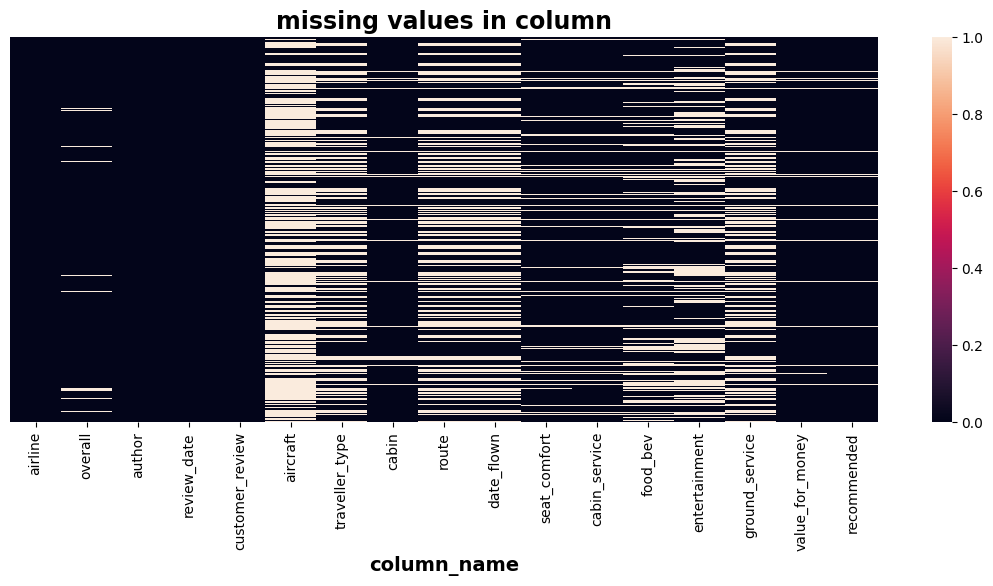

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [ ]:
# droping the rows which have all values as NaN
df.dropna(how='all',inplace=True)

### What did you know about your dataset?


The dataset contains 131,895 rows and 17 columns. Among the columns, 7 are of float type, while 10 are of object type. However, it is notable that the dataset has a considerable number of missing values, with a total of 1,783 overall missing data points.

The specific missing data counts for each feature are as follows:

1. Author/Review Date/Customer Review: 1 missing entry.
2. Type of Aircraft: 42,696 missing entries.
3. Traveller Type: 23,644 missing entries.
4. Cabin: 2,479 missing entries.
5. Route: 23,671 missing entries.
6. Date Flown: 23,750 missing entries.
7. Seat Comfort: 4,973 missing entries.
8. Cabin Service: 4,944 missing entries.
9. Food Beverages: 12,843 missing entries.
10.Entertainment: 20,954 missing entries.
11.Ground Service: 24,015 missing entries.
12.Value for Money: 1,857 missing entries.
13.Recommended: 1,423 missing entries.
These missing values could impact the analysis and modeling process, so it is essential to handle them appropriately to ensure the accuracy and reliability of any conclusions drawn from the dataset.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,61183,81,Spirit Airlines,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,59401.0,NaN,NaN,NaN,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
author,61183,44069,Anders Pedersen,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,61183,3015,19th January 2015,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,61183,61172,I flew from Chicago O'Hare to Dublin and from ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,18488,2088,A320,2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,37540,4,Solo Leisure,13935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,58705,4,Economy Class,45171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,37513,24549,BKK to LHR,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_flown,37434,63,August 2015,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ***Variables Description***

There are 17 variables in the dataset,

*   **airline**: Name of the airline.

*   **overall**: Overall point is given to the trip between 1 to 10.

*   **author**: Author of the trip

*   **reviewdate**: Date of the customer Review

*   **review**: Review of the customers in free text format

*   **aircraft**: Type of the aircraft

*   **travellertype**: Type of traveler (e.g. business, leisure)

*   **cabin**: type of cabin economy/business/first class

*   **route**: route of flight

*   **date flown**: date of the flight

*   **seatcomfort**: Rated between 1-5

*   **cabin service**: Rated between 1-5

*   **foodbev**: Rated between 1-5

*   **entertainment**: ratings for entertainment between 1-5

*   **groundservice**: Rated between 1-5

*   **valueformoney**: Rated between 1-5

*   **recommended**: - yes or no

In [ ]:
# Check Unique Values for each variable.
n = df.nunique(axis=0)

print("No.of.unique values in each column :\n",n)

No.of.unique values in each column :
 airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64


###There are 81 unique airlines in the data

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
value = len(df[df.duplicated()])
value

0

In [ ]:
df.isnull().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

In [ ]:
#Droping rows with null values in entire row
df.dropna(how='all',inplace=True)

In [ ]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
df['date_flown'].array

<PandasArray>
[datetime.datetime(2019, 5, 1, 0, 0), datetime.datetime(2019, 5, 1, 0, 0),
 datetime.datetime(2019, 5, 1, 0, 0),                        'April 2019',
 datetime.datetime(2019, 5, 1, 0, 0), datetime.datetime(2019, 5, 1, 0, 0),
                        'April 2019',                        'April 2019',
                        'April 2019',                     'February 2019',
 ...
                                 nan,                                 nan,
                                 nan,                                 nan,
                                 nan,                                 nan,
                                 nan,                                 nan,
                                 nan,                                 nan]
Length: 61183, dtype: object

In [ ]:
#Changing date_flown to Datetime object
df['date_flown'] = df['date_flown'].apply(lambda x:pd.to_datetime(x))

# Create a column 'travel_month' to identify in which month the passengers travel
df['travel_month'] = df['date_flown'].dt.month


In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'travel_month'],
      dtype='object')

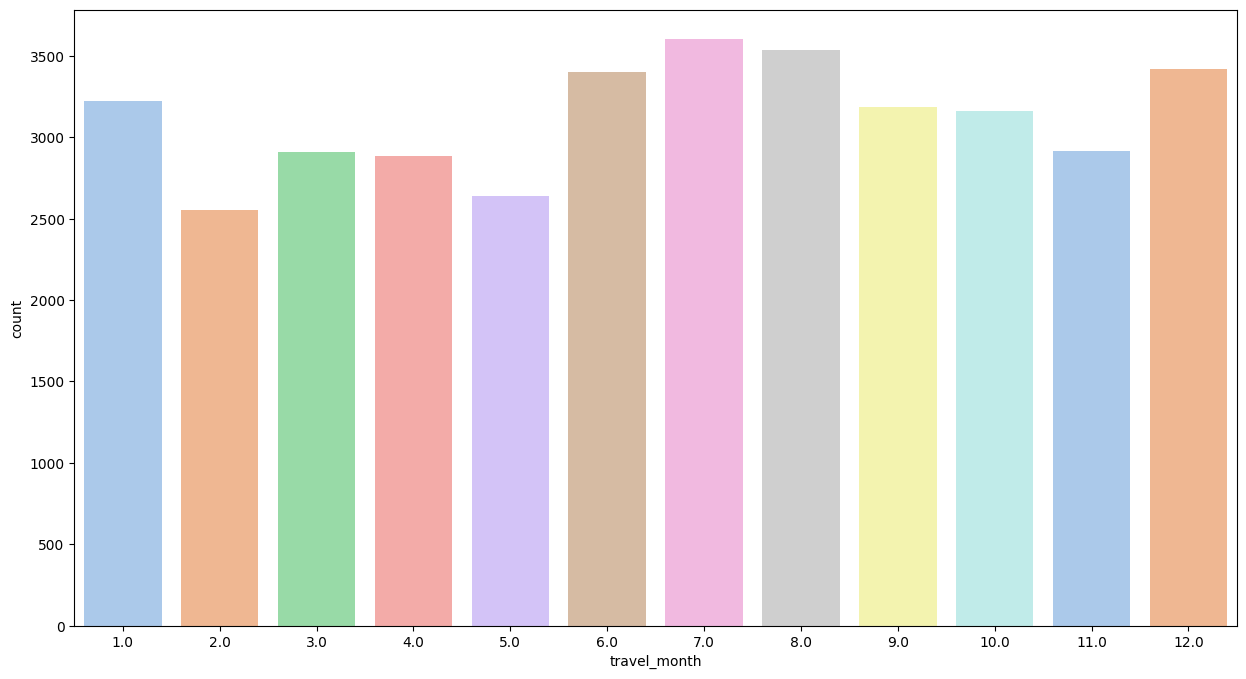

In [ ]:
# Visualize the count of travel month
plt.figure(figsize=(15,8))
sns.countplot(x=df['travel_month'], color ='b',palette='pastel')
plt.show()


July emerges as the most active month for flights, likely owing to various factors such as seasonal demand, particularly for vacation travel. Additionally, events like festivals and conferences can contribute to the increased travel activity during this month.

On the other hand, February stands out as the least occupied month for flights. This observation could be attributed to seasonal factors like colder weather or holidays, which might deter people from traveling during this time. Other events or factors that affect travel demand could also play a role in the decreased flight activity in February.

### What all manipulations have you done and insights you found?


After adjusting the datetime using a lambda function, a bar chart was created to compare the number of flights for each month. The statistical analysis revealed that February had the lowest number of flights, while July had the highest number of flights. Following July, the months with the next highest flight frequencies were August and December, respectively. This data indicates that there is a clear variation in flight volumes throughout the year, with July being the most active and February the least active month for flights.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
top_airline = df['airline'].value_counts()[0:5] # to get the name and count of top 5 airlines
top_airline

Spirit Airlines      2871
American Airlines    2846
United Airlines      2774
British Airways      2731
Emirates             1763
Name: airline, dtype: int64

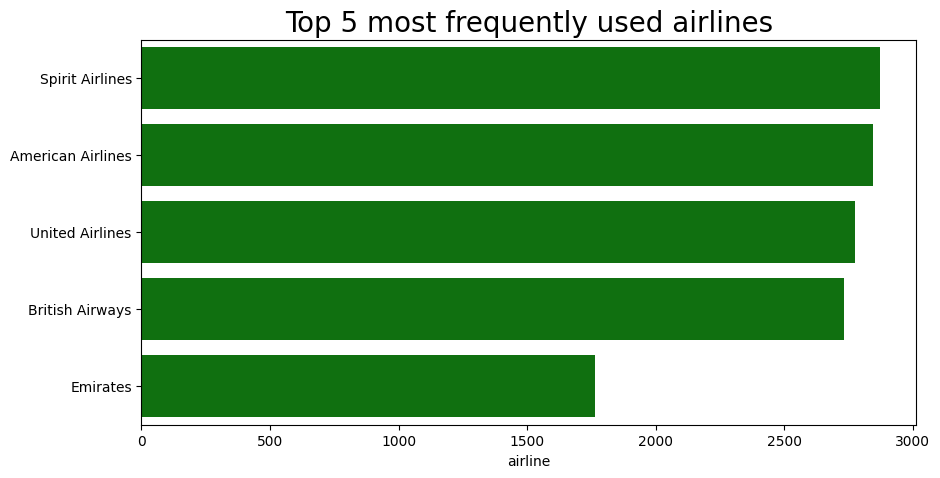

In [ ]:
# Visualize the top 5 most frequently used airlines
plt.figure(figsize=(10,5))
graph=sns.barplot(x=top_airline,y=top_airline.index,data=df,color='green')
graph.set_title('Top 5 most frequently used airlines', fontsize = 20);
plt.show()

In [ ]:
bottom_airline = df['airline'].value_counts()[-5:] # to get the name and count of bottom 5 airlines
bottom_airline

QantasLink            104
Adria Airways          85
Air Arabia             80
Tunisair               71
Thai Smile Airways     48
Name: airline, dtype: int64

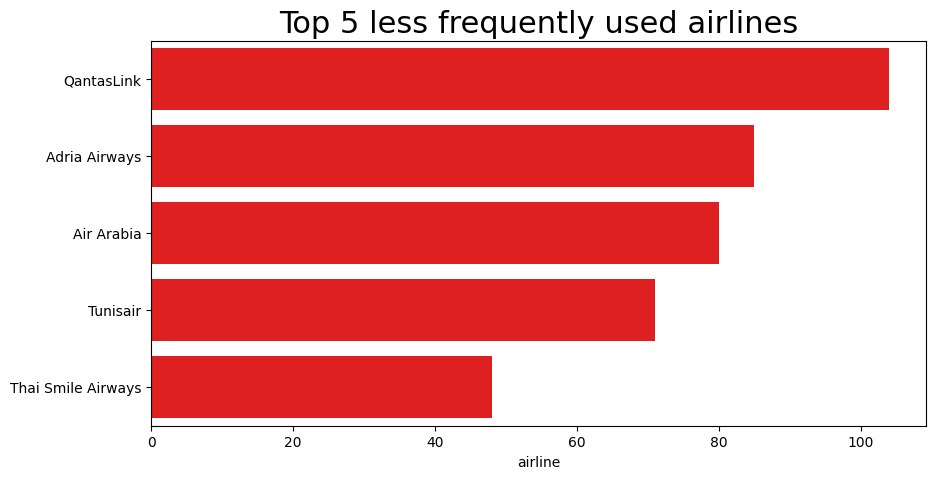

In [ ]:
# Visualize the 5 less frequently used airlines
plt.figure(figsize=(10,5))
graph=sns.barplot(x=bottom_airline,y=bottom_airline.index,data=df,color='red')
graph.set_title('Top 5 less frequently used airlines', fontsize = 22);
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is indeed a univariate plot that represents different observations of a single feature. It is well-suited for comparing different airlines in the dataset based on a specific metric or feature, such as the number of flights for each airline.

The diagram shows the number of flights for each month and highlights that July has the most flights followed by August and December, is likely a time series bar plot that displays the temporal distribution of flight frequencies over the months. It is not directly related to comparing airlines, but it provides valuable insights into the seasonal variations in flight activities.

To compare different airlines in the dataset, you would typically create a bar plot that represents each airline as a separate bar, and the height of each bar would correspond to a specific metric or feature, such as customer satisfaction ratings or the number of flights operated by each airline. This would allow you to visually assess how the airlines perform in comparison to one another.

##### 2. What is/are the insight(s) found from the chart?

Based on the data shown in the bar plot, it appears that Spirit Airlines has the highest number of flights among the airlines in the dataset. Following Spirit Airlines, American Aircraft has the second-highest number of flights. On the other hand, Thai Smile Airways has the lowest number of flights among the airlines represented in the dataset.

This observation highlights the disparities in the flight volumes across different airlines and provides valuable insights into their respective operations and market presence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This analysis provides some possible reasons for the variation in the number of flights among different airlines in the dataset.

For Spirit Airlines, the higher number of flights could indeed be influenced by factors such as its safety reputation, reliability, and efficiency, which may attract more passengers and contribute to increased demand for their services. Additionally, Spirit Airlines might have a wider route network and offer more frequent flights to popular destinations, further driving up their flight volume.

On the other hand, Thai Smile Airways' lower number of flights could be attributed to several factors. As you mentioned, lower demand for flights to the destinations they serve could be a contributing factor. This might be due to less popular or less frequently traveled routes, limiting their operational frequency. Furthermore, higher competition from other carriers on those routes might also impact the demand for Thai Smile Airways' flights.

Overall, these insights suggest that a combination of factors, including safety reputation, route network, and market demand, plays a role in determining the number of flights for each airline in the dataset.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
top_aircraft = df['aircraft'].value_counts()[0:5] # to get the name and count of top 5 aircrafts
top_aircraft

A320              2130
A380              1109
Boeing 777        1101
Boeing 737-800    1021
A330               974
Name: aircraft, dtype: int64

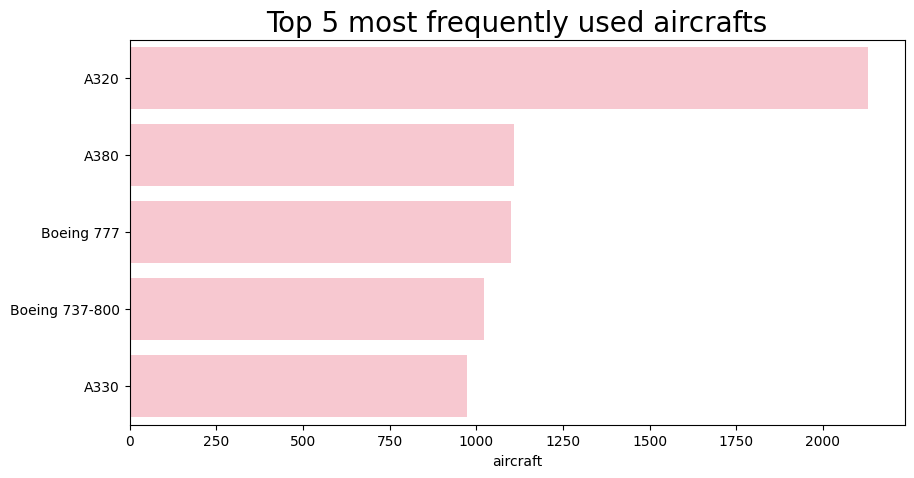

In [ ]:
# Visualize the most frequent aircraft
plt.figure(figsize=(10,5))
graph=sns.barplot(x=top_aircraft,y=top_aircraft.index,data=df, color='pink')
graph.set_title('Top 5 most frequently used aircrafts', fontsize = 20);
plt.show()

##### 1. Why did you pick the specific chart?

 The bar plot you is indeed a univariate plot that showcases the overall "YES" recommendations for five different types of aircraft in the dataset. This plot allows for a straightforward comparison of the recommendation levels for each aircraft type, providing insights into how passengers perceive and rate their experiences with these specific aircraft models.

The plot's visual representation allows stakeholders to quickly grasp which aircraft types have received more positive recommendations and which ones have received fewer. Such information can be valuable for airlines and other aviation-related industries to understand customer preferences, identify potential areas for improvement, and make informed decisions regarding fleet management and customer satisfaction initiatives.

##### 2. What is/are the insight(s) found from the chart?

1.A320 has the highest rating.

2.Boeing 777 has the second-highest rating.

3.A380 has the third-highest rating.

4.A330 has the fourth-highest rating.

5.Boeing 737-800 has the fifth-highest rating.

These rankings indicate how passengers have rated their experiences with each aircraft type, with the A320 receiving the most favorable reviews and the Boeing 737-800 receiving the least favorable reviews among the five types of aircraft in the dataset. Such insights can be valuable for airlines and aviation companies to understand customer preferences and make data-driven decisions to enhance passenger satisfaction and experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The ratings of different aircraft types as provided highlight the significant differences in passenger perceptions and satisfaction levels. The A320 stands out as the most impressive aircraft, garnering high levels of respect and offering a superior level of comfort, reliability, and quality. On the other hand, the A380 follows the Boeing 777, A330, and Boeing 737-800 in descending order of ratings, showcasing variations in quality and performance among these aircraft types as perceived by passengers.

For airlines and other travel providers, these ratings hold crucial business implications. Opting for aircraft that receive high ratings from clients and deliver exceptional comfort and quality can lead to a positive impact on the business. Investing in new or modernizing existing aircraft, as well as implementing measures to maintain and upgrade existing fleets, can be strategic moves to enhance passenger satisfaction and overall travel experience.

Furthermore, actively seeking and incorporating client feedback can be instrumental in driving progressive improvements to both the aircraft and the overall travel experience. Understanding customer preferences and addressing their concerns can help airlines tailor their services to meet and exceed customer expectations, fostering loyalty and attracting more passengers.

Ultimately, making informed decisions based on customer ratings and feedback is paramount for airlines and travel suppliers to stay competitive and deliver exceptional experiences that resonate with their clientele.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
top_flown_route = df['route'].value_counts()[0:5] # to get the name and count of top 5 flown route
top_flown_route

BKK to LHR               31
LHR to JFK               30
Vancouver to Toronto     28
LHR to BKK               27
Guangzhou to New York    26
Name: route, dtype: int64

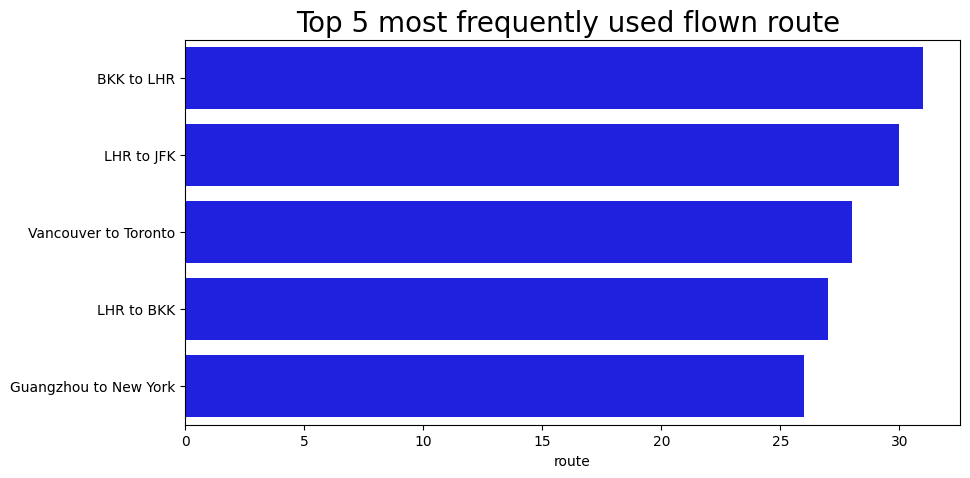

In [ ]:
# Visualize the top 5 most flown route
plt.figure(figsize=(10,5))
graph=sns.barplot(x=top_flown_route ,y=top_flown_route .index,data=df,color='blue')
graph.set_title('Top 5 most frequently used flown route ', fontsize = 20);
plt.show()

##### 1. Why did you pick the specific chart?

Barplot is a univariate plot which is great to show different observations of single feature.
The above chart was picked for comparsion of the most frequently used flown route of various airlines in the dataset.

##### 2. What is/are the insight(s) found from the chart?

 providing the information on the top 5 most flown routes based on the above graph. The following routes have been identified as the most popular in terms of flight frequency:

1. BKK (Bangkok, Thailand) to LHR (London Heathrow, United Kingdom)
2. LHR (London Heathrow, United Kingdom) to JFK (New York John F. Kennedy, USA)
3. Vancouver (Canada) to Toronto (Canada)
4. LHR (London Heathrow, United Kingdom) to BKK (Bangkok, Thailand)
5. Guangzhou (China) to New York (USA)
These routes appear to have the highest number of flights, indicating their popularity and demand among travelers. Airlines and aviation companies can use this information to optimize their flight schedules, assess market demands, and plan their operations more efficiently. Additionally, understanding the busiest routes can help airlines allocate resources effectively to cater to the needs of travelers on these popular journeys.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

BKK to LHR is the most frequently used flown route, The reason may be the shorter drive or more the route connecting denser cities.

#### Chart - 4

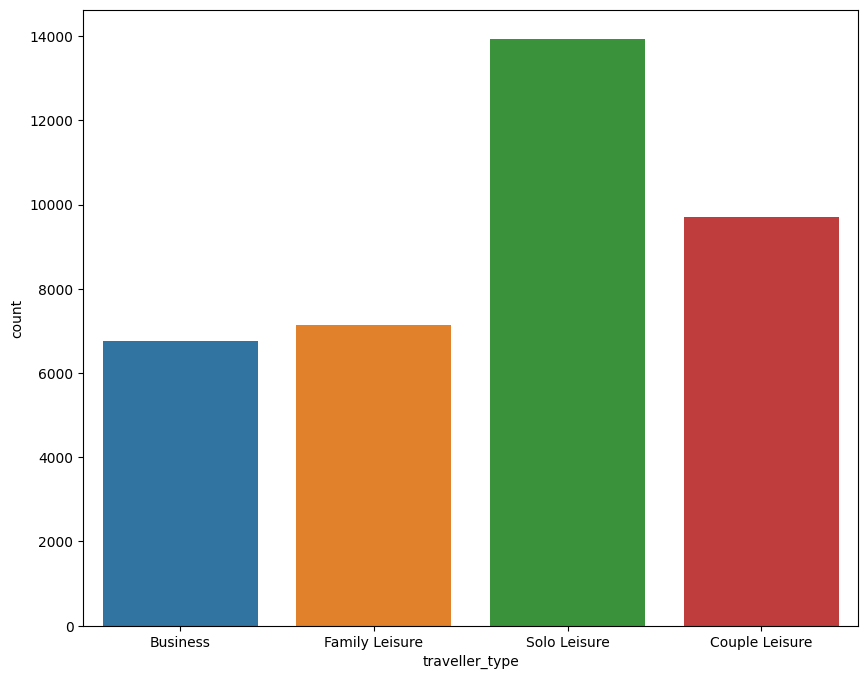

In [ ]:
# Chart - 3 visualization code
# Visualize the count of traveller type
plt.figure(figsize=(10,8))
sns.countplot(x=df['traveller_type'])
plt.show()

##### 1. Why did you pick the specific chart?

The chart is a count plot, which is a type of bar plot that displays the counts of observations in each categorical bin using bars. Count plots are typically used for visualizing categorical variables rather than quantitative variables.

In this specific count plot, the comparison is made among various types of travelers. Each bar represents the count of observations corresponding to different categories of travelers. The height of each bar indicates the number of occurrences or observations for each traveler type, allowing for a straightforward comparison of the counts among the different categories.

Count plots are particularly useful for understanding the distribution of categorical data and identifying patterns or trends in the data. By analyzing this count plot, one can gain insights into the relative prevalence of different types of travelers, which may have implications for airlines and travel companies in tailoring their services and marketing strategies to specific customer segments.







##### 2. What is/are the insight(s) found from the chart?

1. Solo Leisure travelers are the most prevalent group among the travelers.

2. Couple Leisure travelers come next in terms of frequency.

3. Family Leisure travelers rank third in terms of the number of occurrences.

4. Business travelers constitute the fourth and final major group among the travelers.

5. Understanding the distribution of these major traveler types is valuable for airlines and travel companies to tailor their services and marketing strategies to cater to the specific needs and preferences of each group. By identifying the most common types of travelers, businesses can better align their offerings to enhance customer satisfaction and overall travel experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analysis highlights the importance of understanding and catering to the specific needs of different consumer segments in the travel industry. Each traveler group has unique requirements and preferences, and tailoring services to meet those demands can lead to improved customer satisfaction and loyalty.

Solo leisure travelers, being the largest consumer segment, represent a substantial opportunity for airlines and travel providers. Creating personalized and engaging travel experiences for individual travelers can attract more customers and lead to increased revenue and brand loyalty.

Business travelers are another crucial segment, and ensuring convenient and efficient travel options for them is essential. Providing amenities and services that cater to business needs, such as priority boarding and seamless connectivity during travel, can make a significant difference in attracting and retaining business travelers.

Family leisure and couple leisure travelers also hold considerable potential for airlines and travel companies. Understanding the needs of families and couples during their travels, such as offering family-friendly amenities or romantic packages, can help in establishing positive brand associations and generating repeat business from these groups.

By recognizing and addressing the demands of each consumer segment, airlines and travel providers can position themselves competitively in the market, enhance customer satisfaction, and achieve long-term success. This customer-centric approach can lead to positive word-of-mouth recommendations and foster positive relationships with travelers from various backgrounds and purposes of travel.

#### Chart - 5

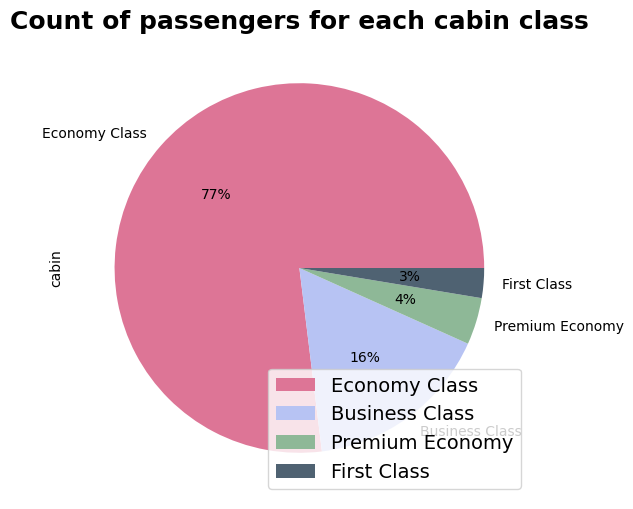

In [ ]:
# Chart - 5 visualization code
# Visualize the count of passengers for each cabin class
# Try to create a pie chart for visualization
colors = ['#DD7596','#B7C3F3','#8EB897','#4F6272']
df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(15,6),colors=colors)
plt.title("Count of passengers for each cabin class",fontsize=18,fontweight='bold') #showing graph title
plt.legend(fontsize=14) #show legend
plt.show()

##### 1. Why did you pick the specific chart?

The chart in question is a pie chart, a type of visualization that represents data as a percentage of a whole. True to its name, a pie chart uses a circle to represent the entire data set, and slices (or "pies") of that circle represent specific categories or segments that make up the whole.

In this specific pie chart, the percentage comparison is made for different cabin types preferred by travelers. Each slice of the pie represents the proportion or percentage of travelers who prefer a specific cabin type, such as Economy, Business, Premium Economy, or First Class.

Pie charts are effective for visually conveying the distribution of data among different categories and providing a clear understanding of the relative proportions of each category compared to the whole. In the context of cabin types, the pie chart can help airlines and travel providers assess the popularity of different cabin classes and make informed decisions about their cabin offerings and pricing strategies to meet customer preferences and demands.







##### 2. What is/are the insight(s) found from the chart?

1. Economy Class is the most preferred cabin class, chosen by 77% of passengers.
This preference is likely due to the lower fares offered in this category, making it a popular choice for budget-conscious travelers.

2. Business Class is the second most chosen cabin class, with 16% of passengers opting for this category. Business Class offers additional amenities, comfort, and services, attracting travelers seeking a more luxurious and convenient travel experience.

3. Premium Economy Class is chosen by 4% of passengers. This cabin class provides a balance between Economy and Business Class, offering better services and comfort than Economy at a more affordable price than Business Class.

4. First Class is the least preferred cabin class, selected by 3% of passengers. First Class typically offers the highest level of luxury, comfort, and personalized services but comes with a premium price tag, making it a choice for a smaller segment of travelers.

Understanding passenger preferences for different cabin classes is essential for airlines to optimize their offerings and ensure they meet the demands of various customer segments. By tailoring their services and pricing strategies based on these preferences, airlines can enhance customer satisfaction and attract a broader range of travelers to their flights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 This analysis provides valuable insights into the preferences of different customer segments when it comes to cabin class choices. Understanding these preferences can help airlines and travel providers make strategic decisions to better cater to the needs and demands of their customers.

1. Economy Class's popularity indicates that many clients prioritize cost-effective travel options. For airlines, focusing on meeting the needs of this customer segment and offering competitive prices and value-added services can help attract and retain budget-conscious travelers.

2. Business Class and Premium Economy's substantial market share demonstrates the interest in more upscale and enhanced travel experiences. Airlines can capitalize on this demand by differentiating their offerings in these classes, providing premium amenities, comfort, and services to attract a broader range of customers seeking a more luxurious travel experience.

3. First Class's smaller market share suggests that the demand for high-end travel experiences might be limited or that there is strong competition in this segment. Airlines could explore ways to make first-class offerings more attractive, such as adding exclusive amenities or targeting specific customer segments with a higher propensity for premium travel.

Offering a range of travel classes at different price points can help airlines appeal to a diverse customer base, catering to various preferences and travel budgets. Additionally, targeting specific customer segments, such as business travelers or families, can allow airlines to tailor their services and marketing efforts more effectively, enhancing customer satisfaction and loyalty.

Overall, leveraging customer insights and aligning offerings with customer preferences is crucial for airlines and travel providers to remain competitive and successful in the dynamic travel industry.

#### Chart - 6

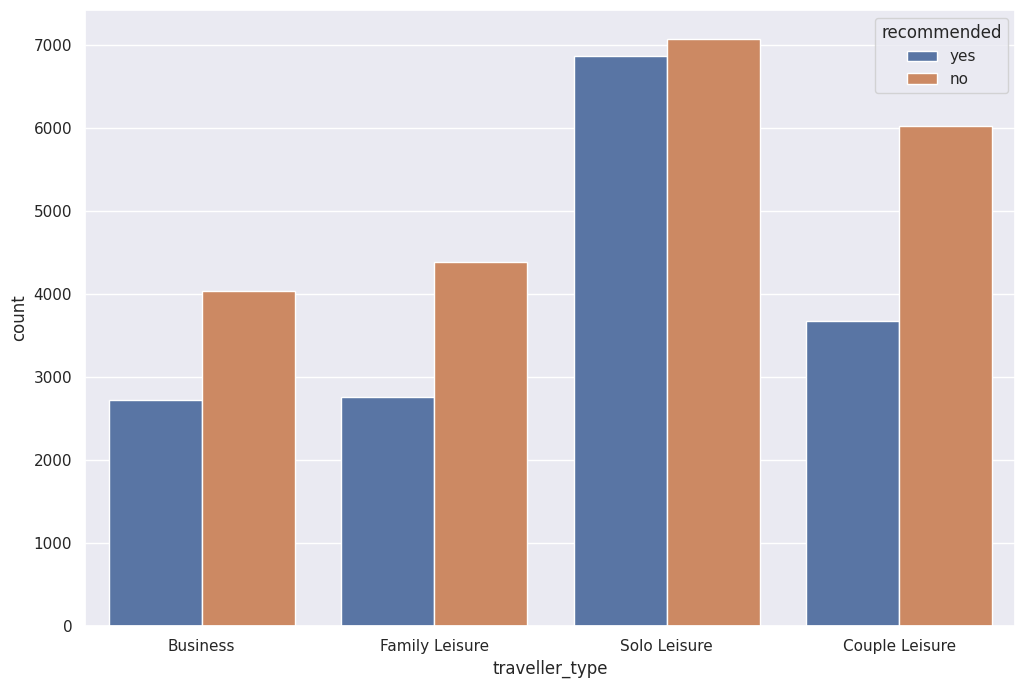

In [ ]:
# Chart - 6 visualization code
# Visulization to check recommendtion pattern in traveller_types
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
sns.countplot(x=df['traveller_type'],hue='recommended',data=df)
plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable.
The above chart compares Yes or No recommendation given by the different type of travellers.

##### 2. What is/are the insight(s) found from the chart?

The No recommendation is highest for all the types of travellers the differences for solo leisure is least, and couple leisure is highest

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This could indicate that there is an opportunity for the business to improve its offerings and better meet the needs of its customers. To create a positive business impact, it may be necessary to examine the reasons why customers are not recommending the business, and to identify areas for improvement. This could involve analyzing customer feedback, examining competitors, and implementing strategies to differentiate the business and improve its offerings.

#### Chart - 7

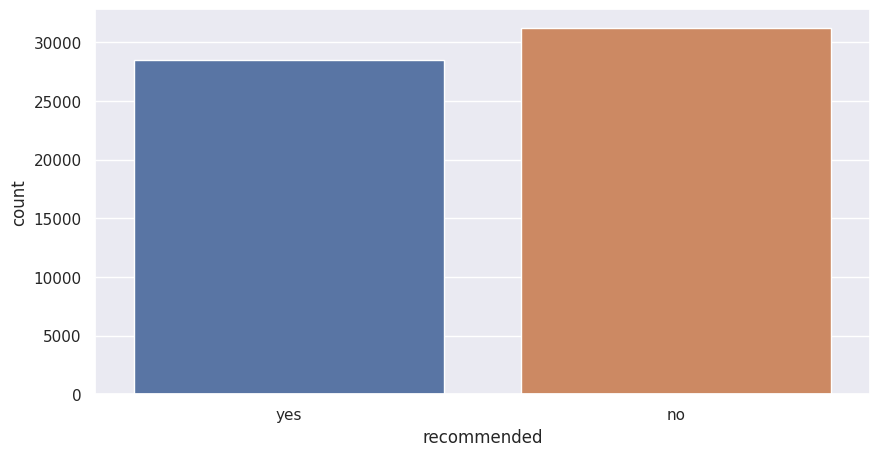

In [ ]:
# Chart - 7 visualization code
# Visualize the count of class in recommended feature
plt.figure(figsize=(10,5))
sns.countplot(x=df['recommended'])
plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable.
The above chart shows recommendation comparison of YES and NO

##### 2. What is/are the insight(s) found from the chart?

Count YES recommendation is below 30000 and count of NO is above 30000

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will demonstrate that there is room for improvement in terms of customer loyalty and loyalty.

In order to make a positive business impact, it is important to identify the variables that keep clients from prescribing business and implement techniques to address these issues and further develop the client experience. This may include dissecting client criticism, looking at competitors, and implementing new strategies or methodologies to solve clients' problems. This can be useful for zero in differentiating the business and offering better items or administrations that surpass client assumptions.

It is important to note that these experiences rely on a limited amount of data, and additional information and testing is expected to make more comprehensive assumptions about a business's performance or development potential.

#### Chart - 8

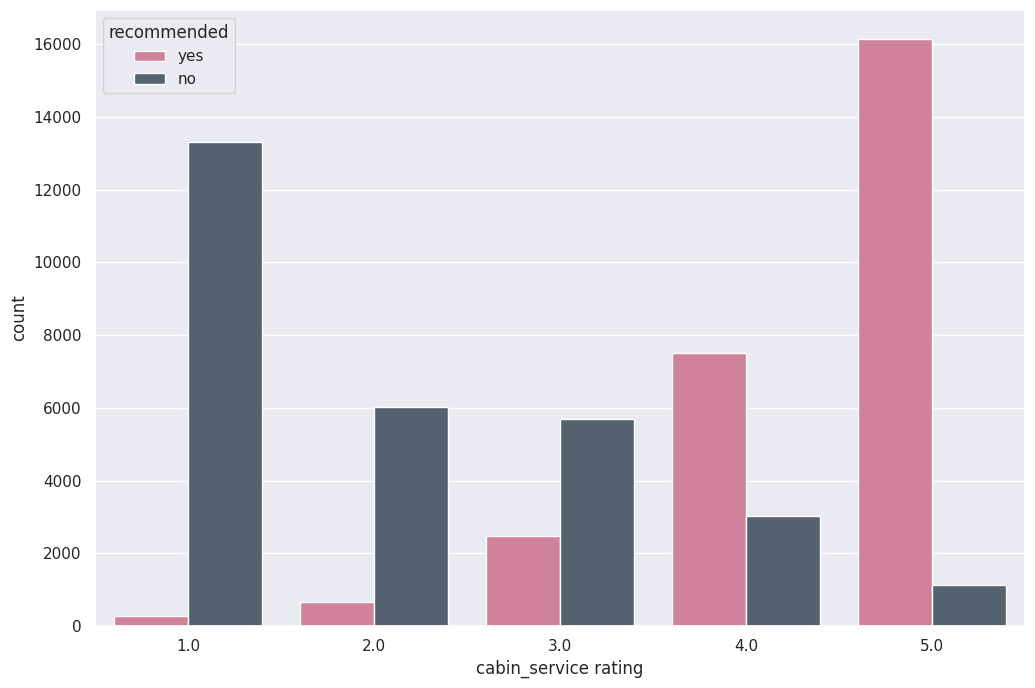

In [ ]:
# Chart - 8 visualization code
# Visualization to check is cabin service score a determinant of recommendation
plt.figure(figsize=(12,8))
sns.countplot(x=df['cabin_service'],hue='recommended',data=df,palette=['#DD7596','#4F6272'])
plt.xlabel('cabin_service rating')
plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable
This above bar chart shows comparison between recommended YES and NO with cabin service rating

##### 2. What is/are the insight(s) found from the chart?

Travelers rated 1 for cabin service with the highest NO suggestion followed by 2 and 3 ratings and 5 being the highest YES suggestion.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are few possible knowledge that can be gleaned from this data:

Poor ratings for cabin service are related to the high rate of not recommending the airline. This suggests that the nature of cabin service is an important variable for clients and further developing lodge administration affects customer loyalty and stability.

Higher ratings for cabin service are associated with a higher rate of recommending the airline. This suggests that providing high-quality cabin service is an important factor for customers, and that this can contribute to customer satisfaction and loyalty.

To create a positive business impact, it may be necessary to focus on improving the quality of cabin service and addressing any issues that are causing customers to rate the service poorly. This could involve training staff, implementing new policies or procedures, or investing in new equipment or amenities. It may also be helpful to seek customer feedback and use this to inform ongoing improvements to cabin service.


#### Chart - 9

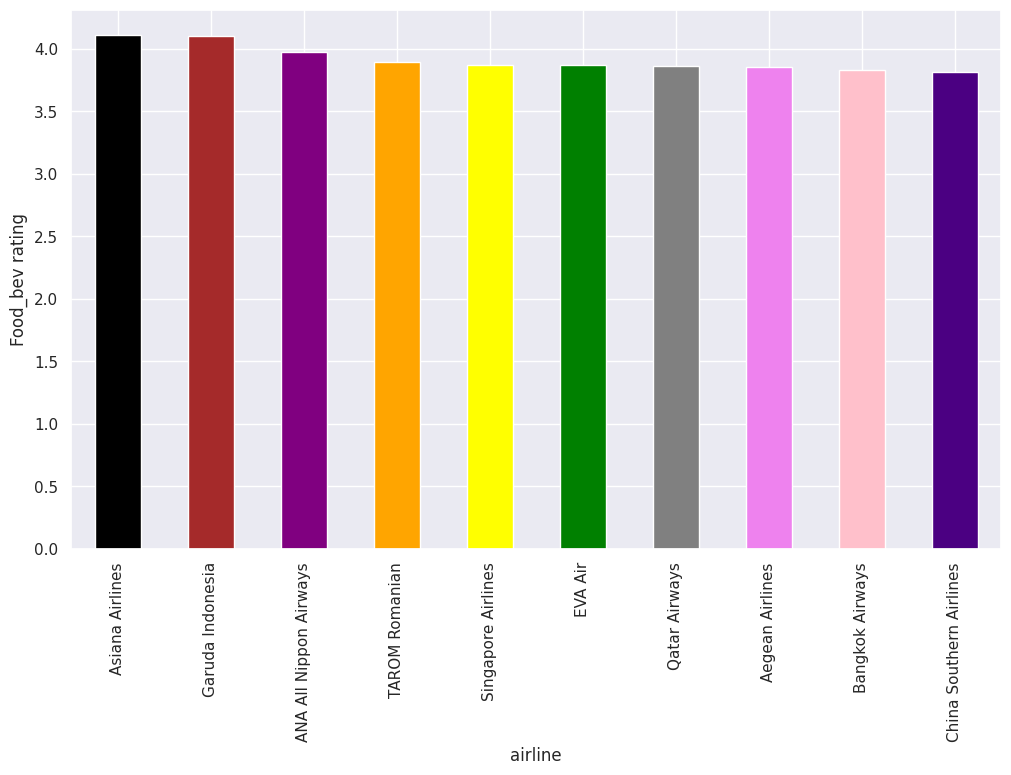

In [ ]:
# Chart - 9 visualization code
# Top airlines which lead in food_bev segment
plt.rcParams['figure.figsize'] = (12, 7)
df.groupby(['airline'])['food_bev'].mean().sort_values(ascending=False).head(10).plot.bar(color = ['black','brown','purple','orange','yellow','green','grey','violet','pink','indigo'])
plt.ylabel('Food_bev rating')
plt.show()


##### 1. Why did you pick the specific chart?

The above chart was picked for comparsion of the ratings of food and beverages various airlines in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Food and beverages wise Asiana and Garuda airlines have the highest rating, ANA all Nippon Airways has second and the lowest ratings are for Bangkok and China Southern Airlines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are a few possible insights that can be drawn from this information:

Asiana and Garuda airlines have a strong reputation for the quality of their food and beverages. This could contribute to customer satisfaction and loyalty, and may help these airlines to attract new customers.

ANA All Nippon Airways has a good reputation for food and beverages, but ranks lower than Asiana and Garuda. This could indicate that the airline has room for improvement in this area, and focusing on enhancing the quality of its food and beverages could be a potential growth opportunity.

Bangkok and China Southern Airlines have lower ratings for food and beverages compared to other airlines. This could be a cause for concern, as poor quality in this area could lead to customer dissatisfaction and potentially harm the reputation of the airline. Improving the quality of food and beverages could be an important focus for these airlines in order to improve customer satisfaction and maintain competitive advantage.

#### Chart - 10

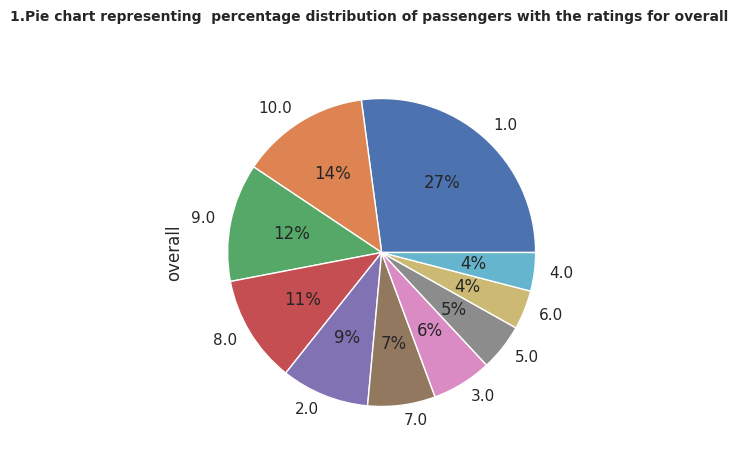

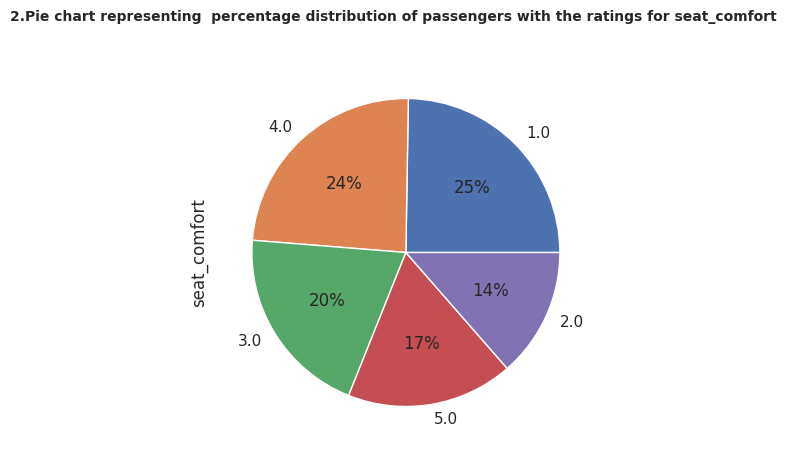

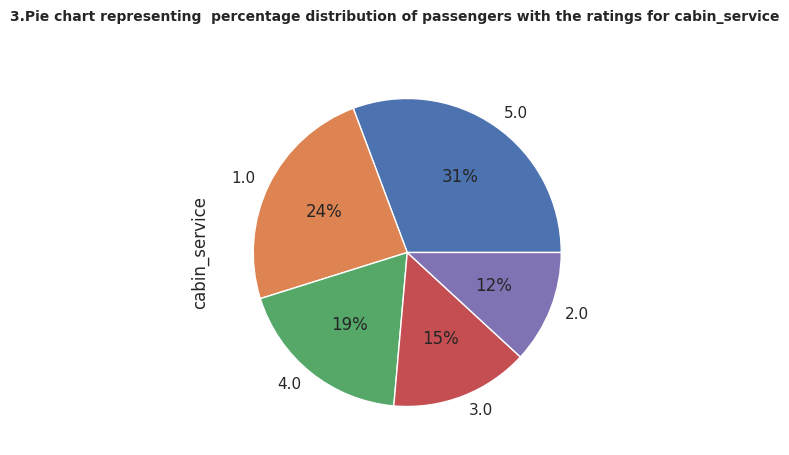

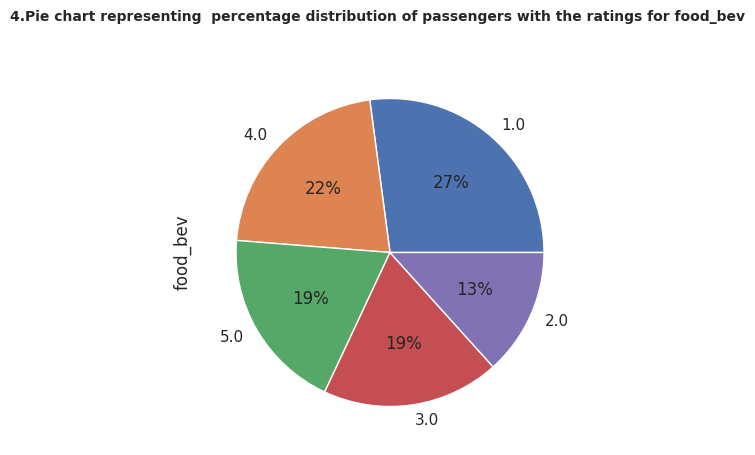

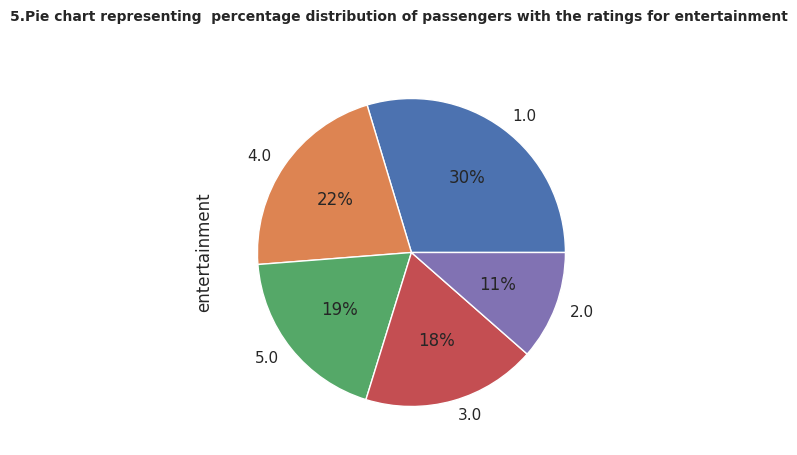

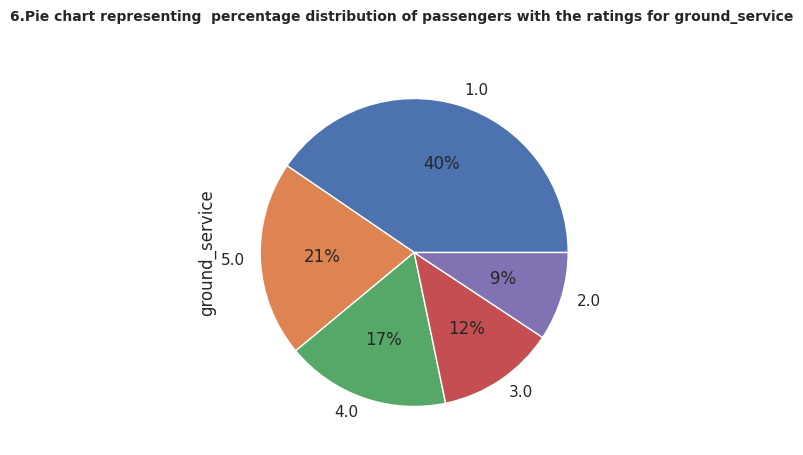

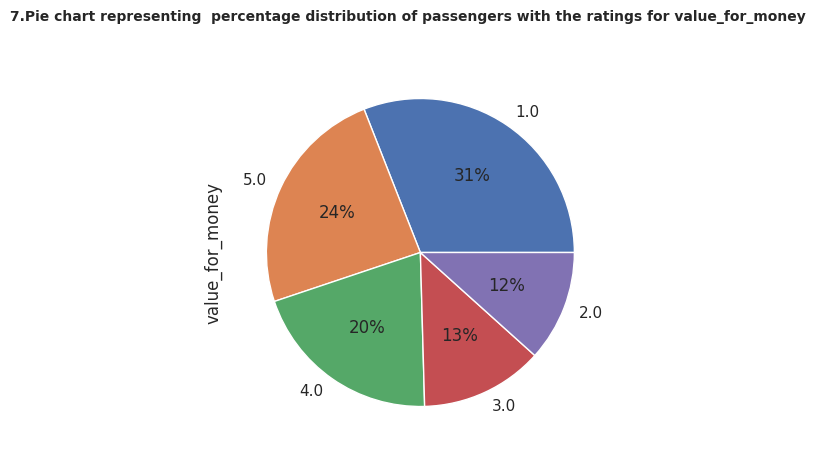

In [ ]:
# Chart - 10 visualization code
# Visualize the percentage distribution of passengers with the ratings for all numerical features
a = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']
for i in a:
  fig = plt.figure(figsize=(10, 5))
  df[i].value_counts().plot(kind='pie',autopct='%1.0f%%')
  plt.suptitle(f'{a.index(i)+1}.Pie chart representing  percentage distribution of passengers with the ratings for {i}',fontsize=10,fontweight='bold')
  plt.show()

##### 1. Why did you pick the specific chart?

Pie chart helps organize and show data as percentage of whole, True to the name this kind of visulization uses a circle to represents the whole, and slices of that cirlce or pie to reprents the specific categories that compose the whole.

#### Chart - 11

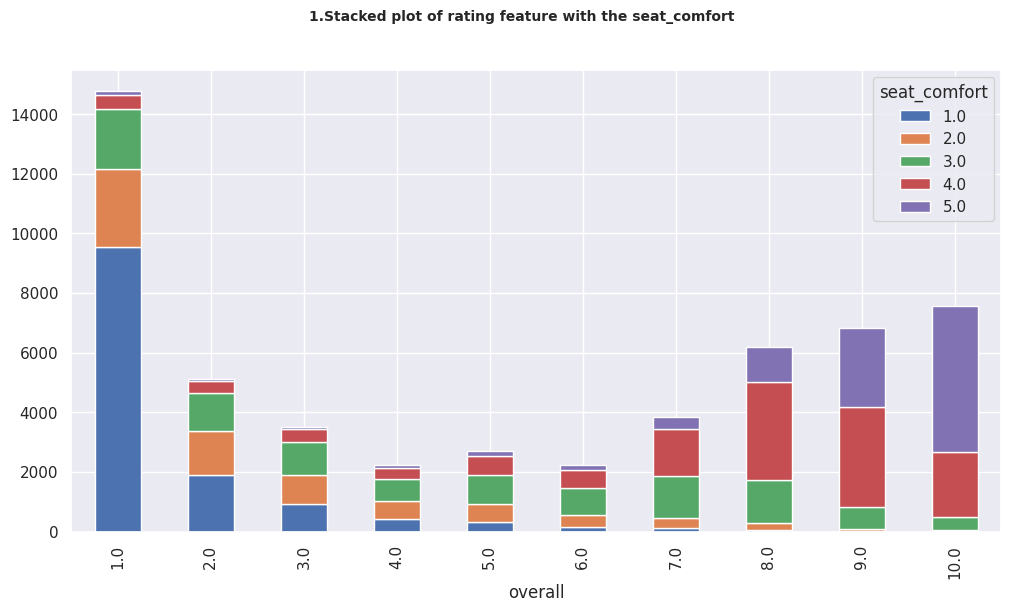

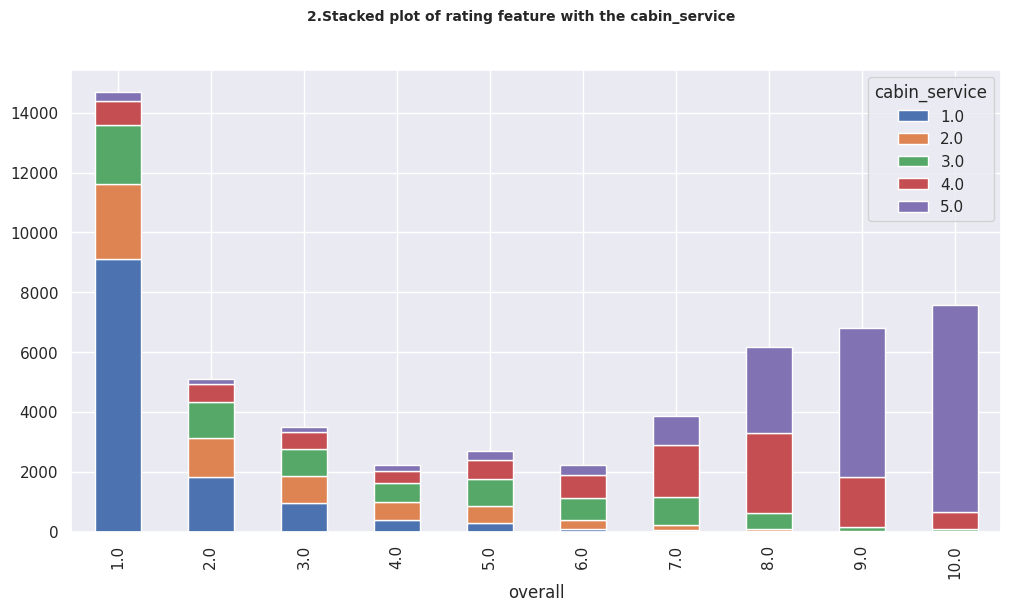

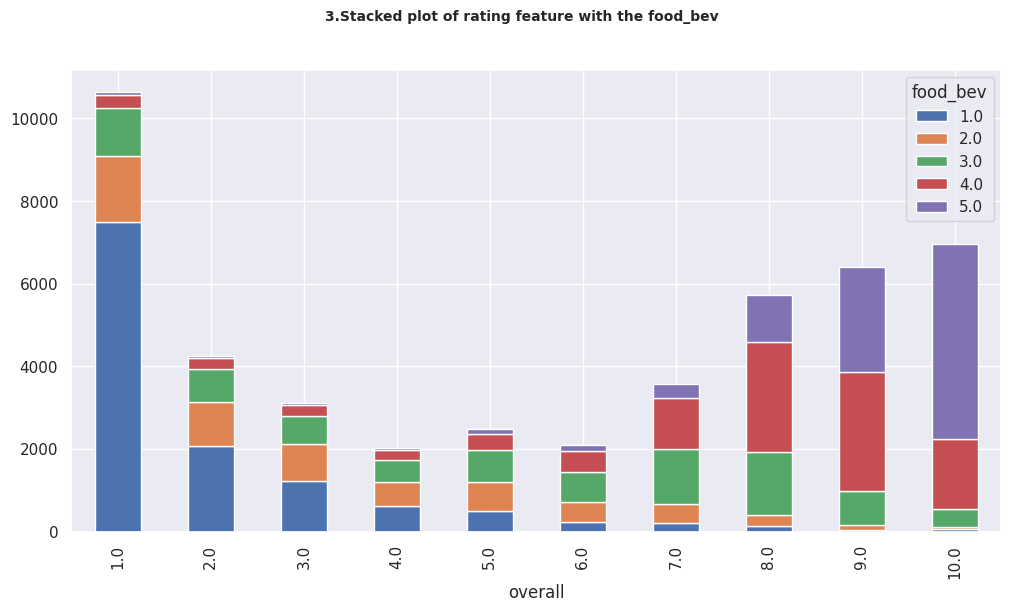

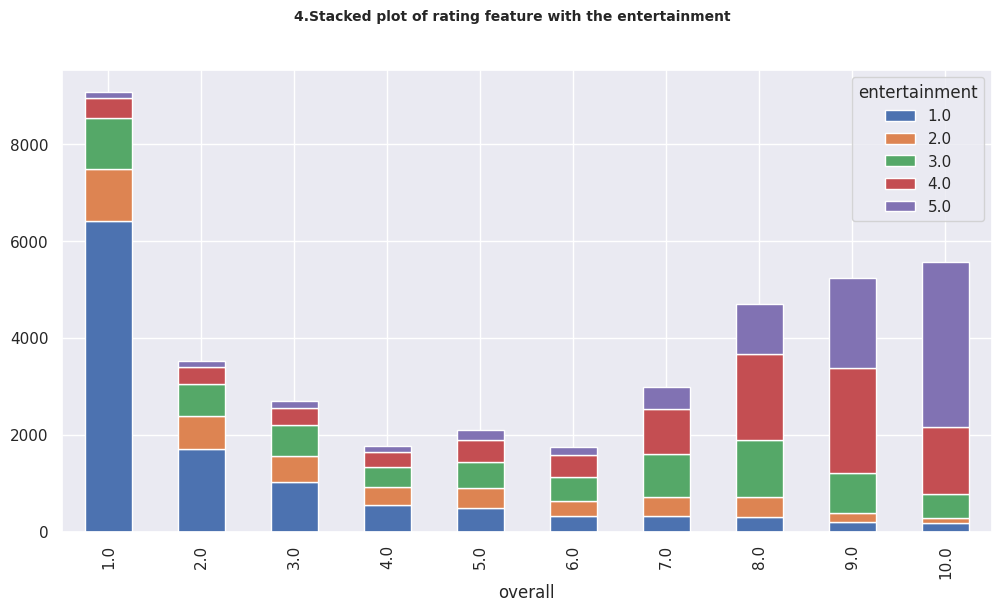

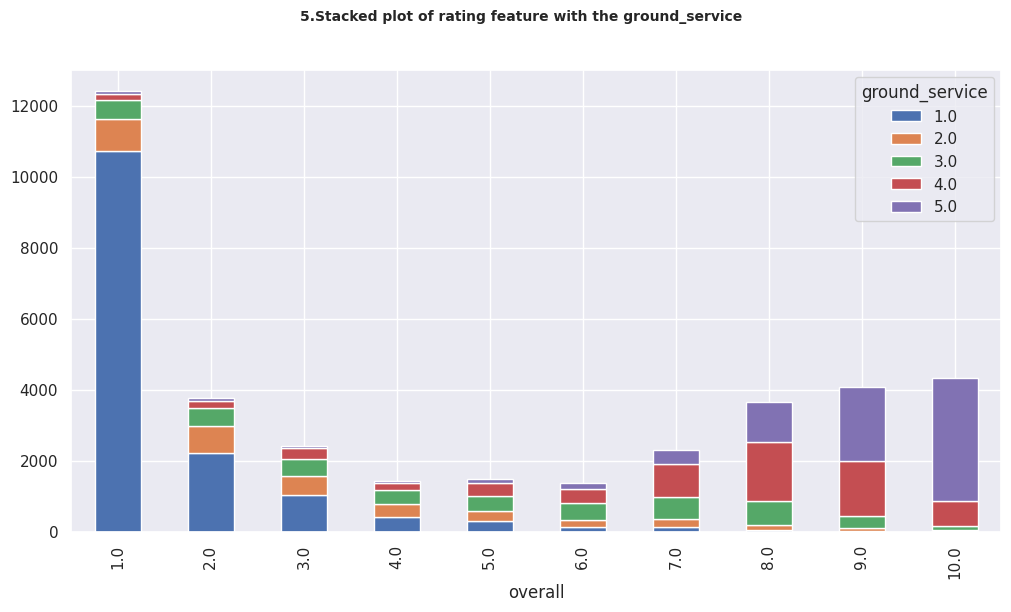

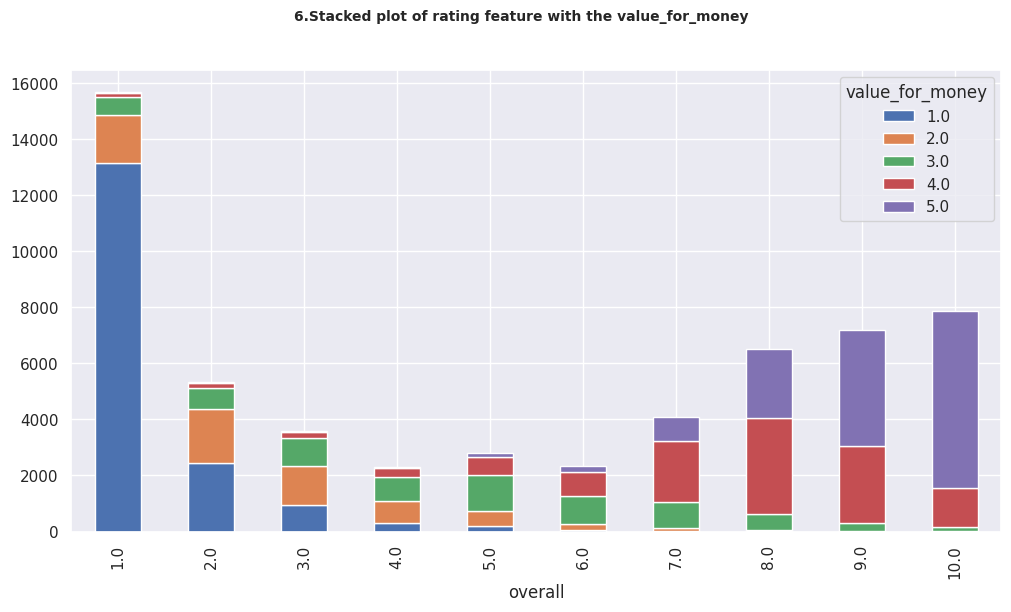

In [ ]:
# Chart - 11 visualization code
# Get Stacked plot of rating features
a = ['seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money'] #review_features
for i in a:
  x = df.groupby([df['overall']])
  x[i].value_counts().unstack().plot(kind= 'bar',stacked = True, figsize=(12,6))
  plt.suptitle(f'{a.index(i)+1}.Stacked plot of rating feature with the {i}',fontsize=10,fontweight='bold')
  plt.show()


##### 1. What is/are the insight(s) found from the chart?

From the above diagram we can conclude that

when the overall rating of the airline company is good (10.0 or 9.0 within the range of 10), the rating of all characteristics like 'seat comfort', 'cabin service', 'food_drinks', 'entertainment', 'ground service' and 'value for money' is high (5.0 or 4.0 mostly within the range of 5).
if the overall rating of the airlines is low (1.0, 2.0 in the range of 10), then in this case all ratings of the evaluation characteristics are also low.
This indicates that the ratings of the rating characteristics have a positive impact on the overall rating of the airline companies which has a massive impact on the airline companies' business.

#### Chart - 12 - Correlation Heatmap

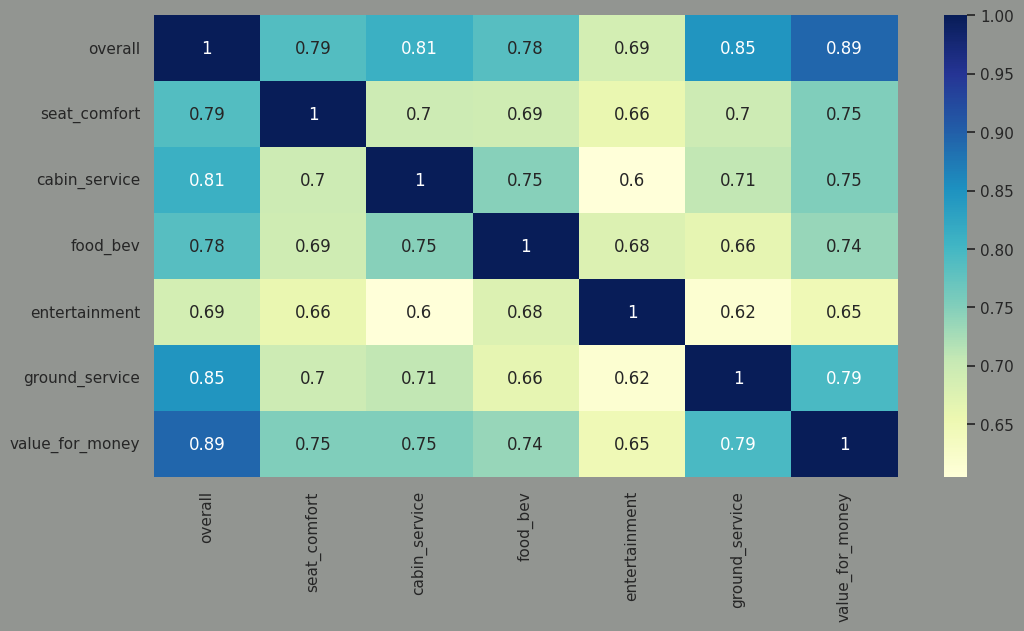

In [ ]:
# Get correlation mtarix on different rating features
cor_matrix =abs(df.drop('travel_month',axis=1).corr())
# Correlation Heatmap visualization code
plt.figure(figsize=(12,6),edgecolor='k',facecolor='xkcd:grey')
sns.heatmap(cor_matrix,annot = True, cmap='YlGnBu',)
plt.show()



##### 1. Why did you pick the specific chart?

Correlation matrix is a table showing correlation coefficients between variables. each cell in the table shows the correlation between two variable, a correlation map used to summarize the data as input into more advanced analysis and dignostic for advanced analysis.

##### 2. What is/are the insight(s) found from the chart?

As we can see from above heatmap "overall" and "value_for_money" is most important independent variable for recommended while "entertainment" is least important from above heatmap

#### Chart - 13 - Pair Plot

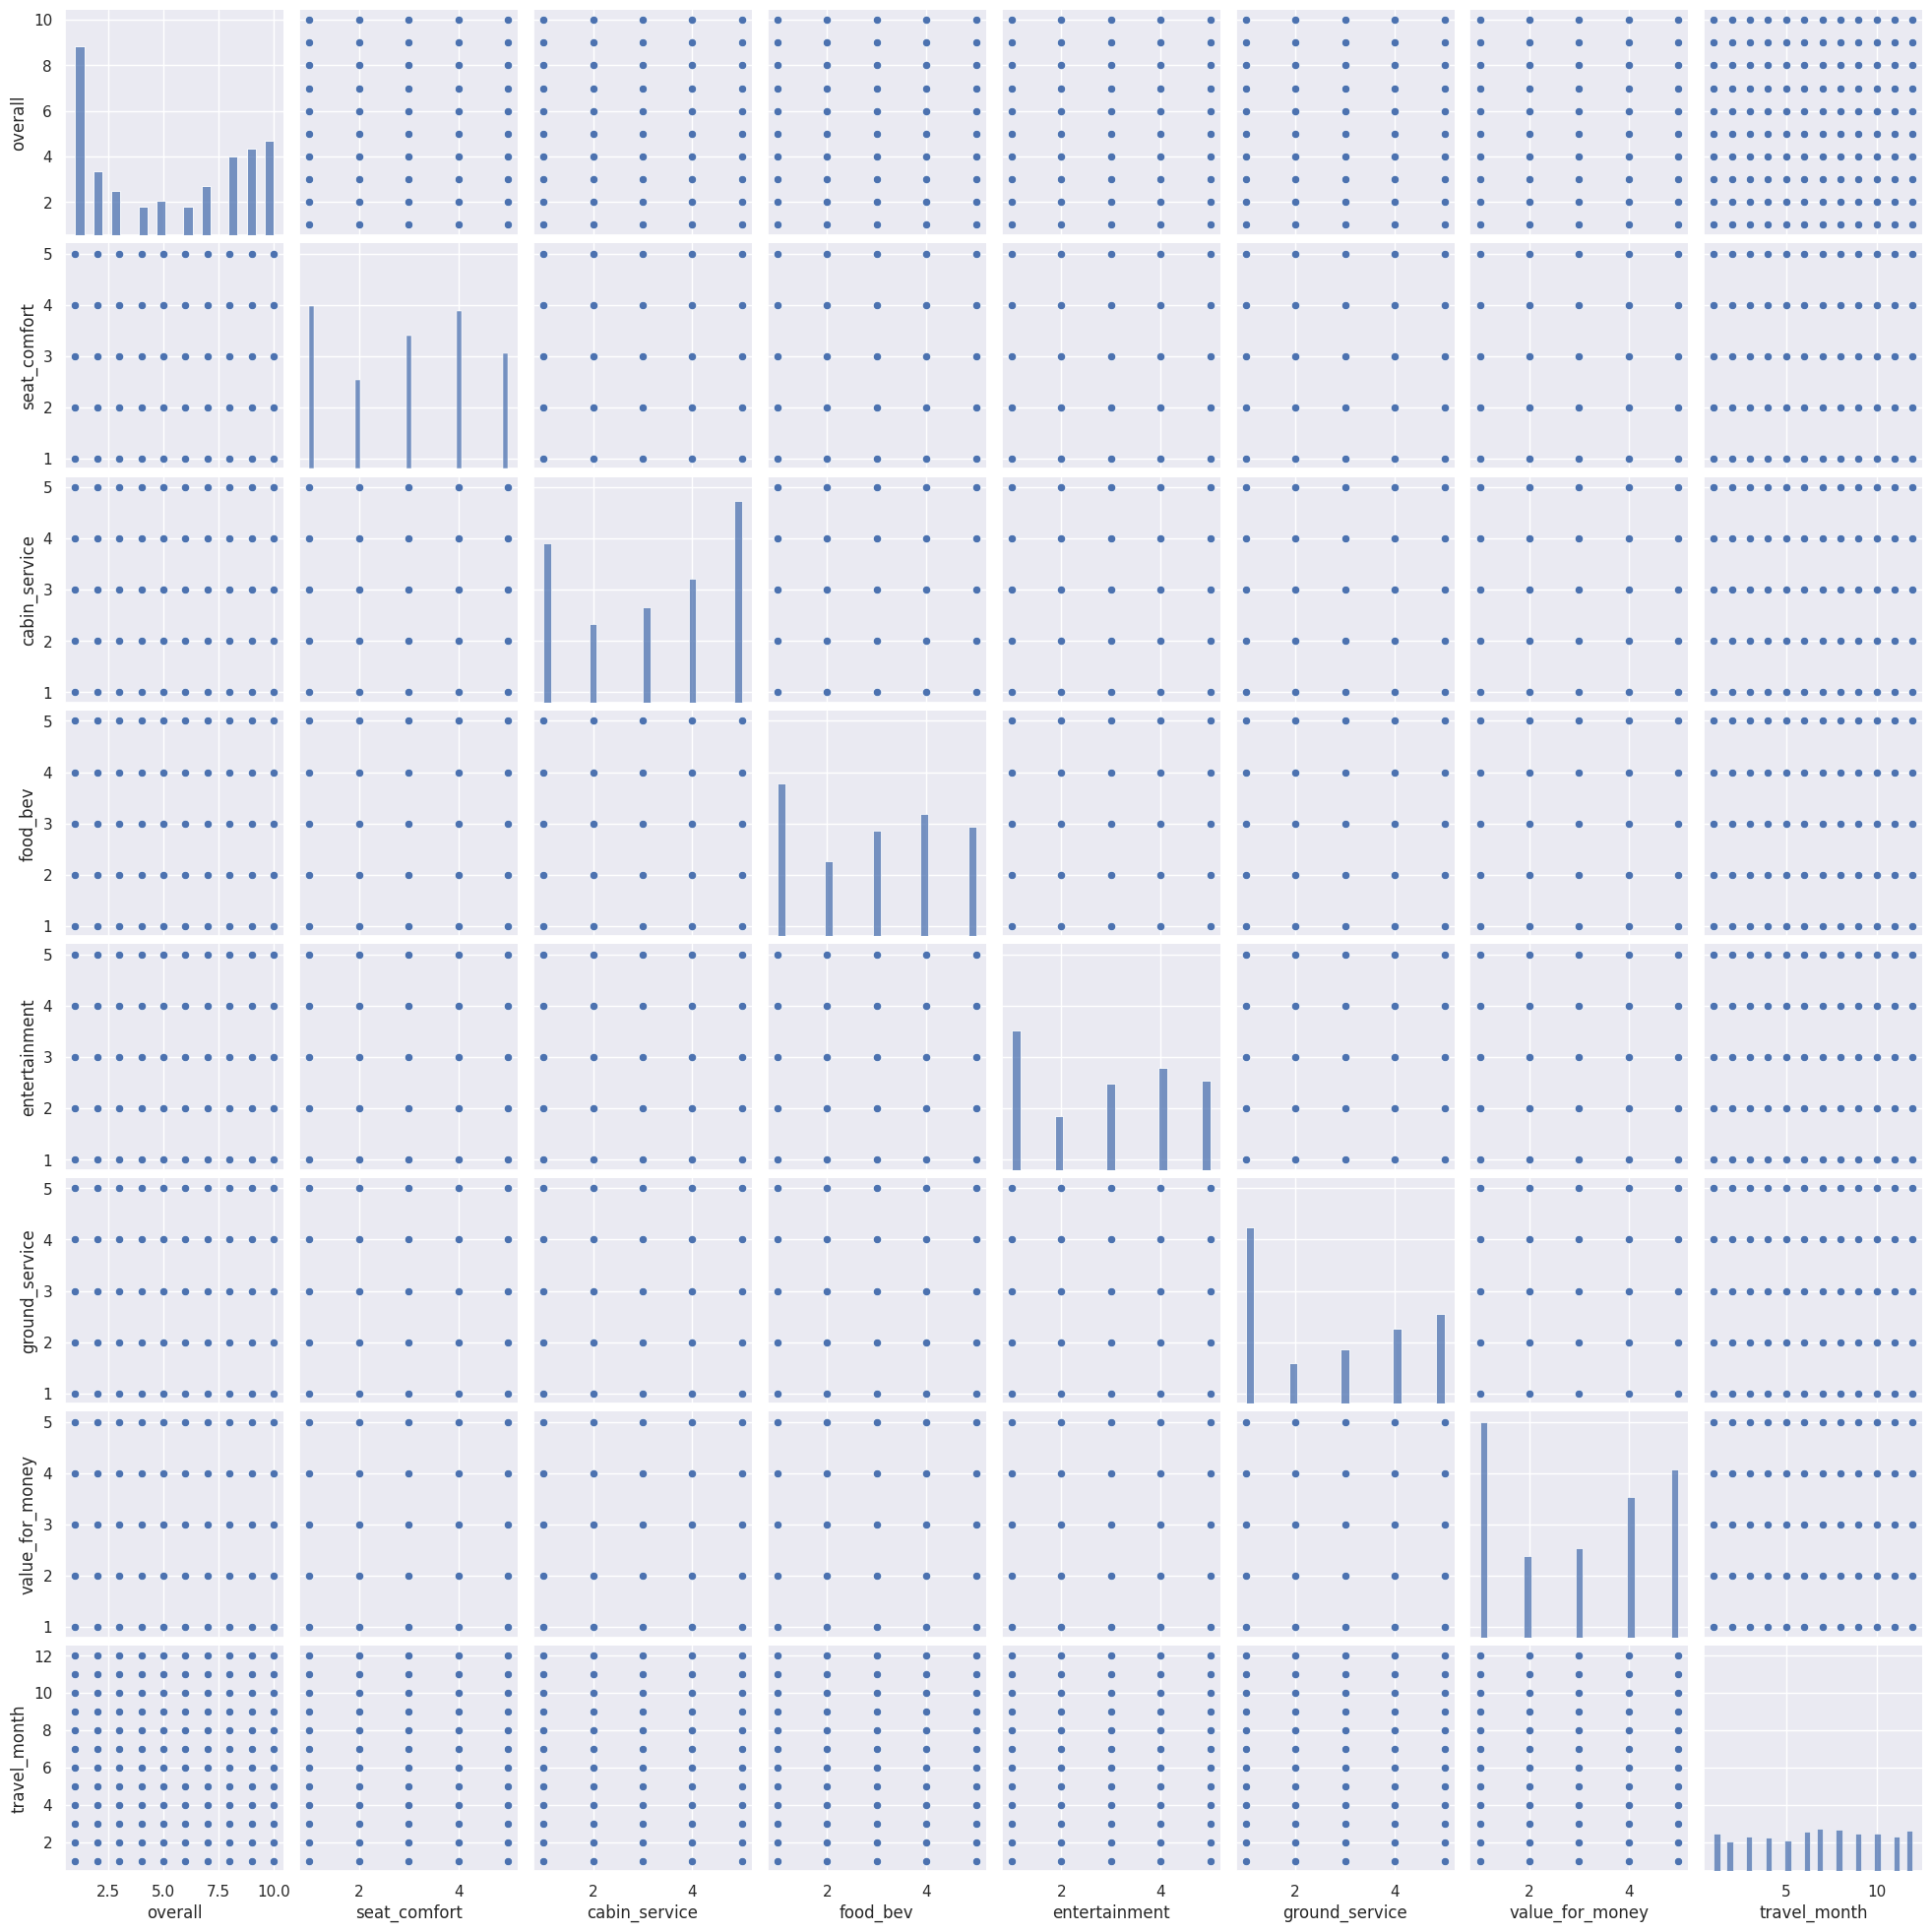

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Pairplpot is used to understand set features to explain relationship between two variables or to form the most separated clusters, it is also helps to form some simple classification models by drawing some simple line or make linear separation in our data-set. I used pairplot to analyse the patterns of data and relationship between features, its exactly same as coorealtion map but here you will get graphical representation.

##### 2. What is/are the insight(s) found from the chart?

As we can see from above pairplot "overall" and "value_for_money" is most important independent variable for recommended while "entertainment" is least important

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
travel_month       23749
dtype: int64

In [ ]:
num_df = df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

In [ ]:
# Filling null values with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
num_df = pd.DataFrame(imputer.fit_transform(num_df),columns = num_df.columns)

In [ ]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          61183 non-null  float64
 1   seat_comfort     61183 non-null  float64
 2   cabin_service    61183 non-null  float64
 3   food_bev         61183 non-null  float64
 4   entertainment    61183 non-null  float64
 5   ground_service   61183 non-null  float64
 6   value_for_money  61183 non-null  float64
dtypes: float64(7)
memory usage: 3.3 MB


In [ ]:
# Features with over 50% of its observations missings will be removed and features which are not important
df = df.drop(columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   author           61183 non-null  object        
 2   review_date      61183 non-null  object        
 3   customer_review  61183 non-null  object        
 4   aircraft         18488 non-null  object        
 5   traveller_type   37540 non-null  object        
 6   cabin            58705 non-null  object        
 7   route            37513 non-null  object        
 8   date_flown       37434 non-null  datetime64[ns]
 9   recommended      59761 non-null  object        
 10  travel_month     37434 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 5.6+ MB


In [ ]:
# To add two non-null dataframe

df=pd.concat([df.reset_index(),num_df.reset_index()],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            61183 non-null  int64         
 1   airline          61183 non-null  object        
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  recommended      59761 non-null  object        
 11  travel_month     37434 non-null  float64       
 12  index            61183 non-null  int64         
 13  overall          61183 non-null  float64       
 14  seat_comfort     61183 non-null  float

In [ ]:
df = round(df.select_dtypes(include=['object','float64']))

In [ ]:
df.head()

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,Turkish Airlines,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,yes,5.0,7.0,4.0,5.0,4.0,4.0,2.0,4.0
1,Turkish Airlines,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,no,5.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0
2,Turkish Airlines,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,no,5.0,3.0,1.0,4.0,1.0,3.0,1.0,2.0
3,Turkish Airlines,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,yes,4.0,10.0,4.0,5.0,5.0,5.0,5.0,5.0
4,Turkish Airlines,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,no,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df.tail()

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
61178,Ukraine International,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,no,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61179,Ukraine International,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,no,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61180,Ukraine International,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,no,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61181,Ukraine International,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,no,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61182,Ukraine International,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,no,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0


### 2. Handling Outliers

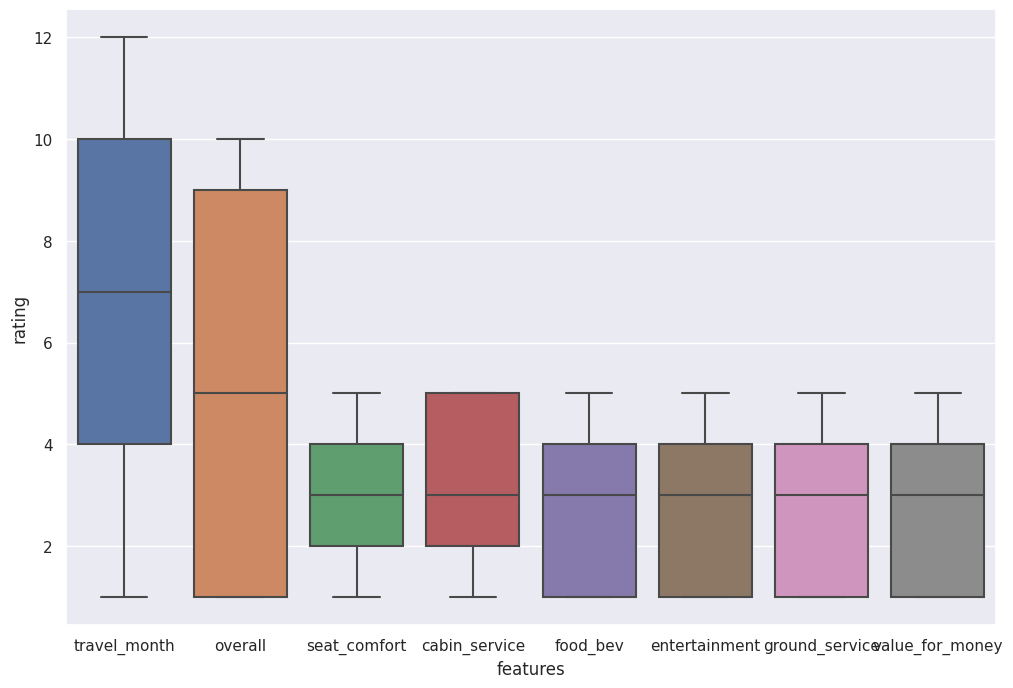

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xlabel("features")
plt.ylabel("rating")
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

 There are no outliers in our data, so no outliers treatment is needed.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#replacing yes=1 and no=0 in recommended column


df['recommended'].replace({'yes':1,'no':0},inplace=True)


In [ ]:
df['recommended'].isna().sum()

1422

In [ ]:
#notna() method returns a DataFrame object where all the values are replaced with a Boolean value True or False
df = df[df['recommended'].notna()]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   author           59761 non-null  object 
 2   review_date      59761 non-null  object 
 3   customer_review  59761 non-null  object 
 4   aircraft         18487 non-null  object 
 5   traveller_type   37539 non-null  object 
 6   cabin            58704 non-null  object 
 7   route            37512 non-null  object 
 8   recommended      59761 non-null  float64
 9   travel_month     37434 non-null  float64
 10  overall          59761 non-null  float64
 11  seat_comfort     59761 non-null  float64
 12  cabin_service    59761 non-null  float64
 13  food_bev         59761 non-null  float64
 14  entertainment    59761 non-null  float64
 15  ground_service   59761 non-null  float64
 16  value_for_money  59761 non-null  float64
dtypes: float64(9

In [ ]:
# Check the correlation plot

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
recommended,1.000000,-0.004002,0.898390,0.719521,0.756843,0.736565,0.668660,0.797478,0.837220
travel_month,-0.004002,1.000000,-0.004173,0.000088,-0.005573,-0.002793,-0.015751,-0.004096,-0.007617
overall,0.898390,-0.004173,1.000000,0.789117,0.816663,0.802788,0.739857,0.879980,0.894839
seat_comfort,0.719521,0.000088,0.789117,1.000000,0.704709,0.725061,0.708971,0.714992,0.755456
cabin_service,0.756843,-0.005573,0.816663,0.704709,1.000000,0.775825,0.665273,0.744625,0.760315
food_bev,0.736565,-0.002793,0.802788,0.725061,0.775825,1.000000,0.728276,0.714309,0.761662
entertainment,0.668660,-0.015751,0.739857,0.708971,0.665273,0.728276,1.000000,0.670868,0.706048
ground_service,0.797478,-0.004096,0.879980,0.714992,0.744625,0.714309,0.670868,1.000000,0.820215
value_for_money,0.837220,-0.007617,0.894839,0.755456,0.760315,0.761662,0.706048,0.820215,1.000000


In [ ]:
# Features present in dataset
features= df.columns
features

Index(['airline', 'author', 'review_date', 'customer_review', 'aircraft',
       'traveller_type', 'cabin', 'route', 'recommended', 'travel_month',
       'overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money'],
      dtype='object')

In [ ]:
features_1= features.drop(['airline','author','aircraft','review_date', 'customer_review','route','recommended'])


In [ ]:
#dropping redundant feature which are not required
df.drop(['author','aircraft','review_date','route','travel_month'],axis=1,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   customer_review  59761 non-null  object 
 2   traveller_type   37539 non-null  object 
 3   cabin            58704 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          59761 non-null  float64
 6   seat_comfort     59761 non-null  float64
 7   cabin_service    59761 non-null  float64
 8   food_bev         59761 non-null  float64
 9   entertainment    59761 non-null  float64
 10  ground_service   59761 non-null  float64
 11  value_for_money  59761 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.9+ MB


In [ ]:
df = df[df['recommended'].notna()]

#**NLP(Natural Language Processing) for reviews**

We have used vander sentiment in NLP so to convert sentiments in customer review into score so to have our model prediction

In [ ]:
# Install vaderSentiment package
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.9 MB/s eta 0:00:00


In [ ]:
#Importing SentimentIntensity Analyzer Class
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#create function to get sentiment score for review
def sentiment_score(s):
  #create SentimentIntensityAnalyzer object
  sia_object=SentimentIntensityAnalyzer()
  #scoring each reviews depending on their polarity
  sentiment_dict=sia_object.polarity_scores(s)
  return sentiment_dict['compound']

In [ ]:
#creatic numeric review column to find and store the polarity of each customer review. df['numeric_review']=df['customer_review'].apply(sentiment_score)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   customer_review  59761 non-null  object 
 2   traveller_type   37539 non-null  object 
 3   cabin            58704 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          59761 non-null  float64
 6   seat_comfort     59761 non-null  float64
 7   cabin_service    59761 non-null  float64
 8   food_bev         59761 non-null  float64
 9   entertainment    59761 non-null  float64
 10  ground_service   59761 non-null  float64
 11  value_for_money  59761 non-null  float64
 12  numeric_review   59761 non-null  float64
dtypes: float64(9), object(4)
memory usage: 6.4+ MB


In [ ]:
# Check the correlation plot

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,recommended,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,numeric_review
recommended,1.000000,0.898390,0.719521,0.756843,0.736565,0.668660,0.797478,0.837220,0.699408
overall,0.898390,1.000000,0.789117,0.816663,0.802788,0.739857,0.879980,0.894839,0.725893
seat_comfort,0.719521,0.789117,1.000000,0.704709,0.725061,0.708971,0.714992,0.755456,0.593969
cabin_service,0.756843,0.816663,0.704709,1.000000,0.775825,0.665273,0.744625,0.760315,0.631408
food_bev,0.736565,0.802788,0.725061,0.775825,1.000000,0.728276,0.714309,0.761662,0.608310
entertainment,0.668660,0.739857,0.708971,0.665273,0.728276,1.000000,0.670868,0.706048,0.554105
ground_service,0.797478,0.879980,0.714992,0.744625,0.714309,0.670868,1.000000,0.820215,0.661630
value_for_money,0.837220,0.894839,0.755456,0.760315,0.761662,0.706048,0.820215,1.000000,0.671077
numeric_review,0.699408,0.725893,0.593969,0.631408,0.608310,0.554105,0.661630,0.671077,1.000000


In [ ]:
#Dropping customer review to replace with numeric review.
df.drop('customer_review' , axis =1, inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   traveller_type   37539 non-null  object 
 2   cabin            58704 non-null  object 
 3   recommended      59761 non-null  float64
 4   overall          59761 non-null  float64
 5   seat_comfort     59761 non-null  float64
 6   cabin_service    59761 non-null  float64
 7   food_bev         59761 non-null  float64
 8   entertainment    59761 non-null  float64
 9   ground_service   59761 non-null  float64
 10  value_for_money  59761 non-null  float64
 11  numeric_review   59761 non-null  float64
dtypes: float64(9), object(3)
memory usage: 5.9+ MB


Now we have numeric_review column in liew of customer_review. also we have 59761 rows, 9 floattype, 3 object type data

##**One Hot encoding for categorical features**

In [ ]:
# one hot encoding on categorrical features
categorical_columns=["airline",'cabin','traveller_type']
dummy = pd.get_dummies(df,columns=categorical_columns)

In [ ]:
dummy.columns

Index(['recommended', 'overall', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'numeric_review',
       'airline_ANA All Nippon Airways', 'airline_Adria Airways',
       'airline_Aegean Airlines', 'airline_Aer Lingus',
       'airline_Aeroflot Russian Airlines', 'airline_Aeromexico',
       'airline_Air Arabia', 'airline_Air Canada', 'airline_Air Canada rouge',
       'airline_Air China', 'airline_Air Europa', 'airline_Air France',
       'airline_Air India', 'airline_Air New Zealand', 'airline_AirAsia',
       'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air 

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding performed on "recommended" as it has bianry values

One hot encoding performed on "airline" and "cabin"

### 4. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#separating the dependent and independent variables
#getting the independent variables
X=dummy.drop('recommended',axis=1)
#getting the dependent variables
y=dummy['recommended']

In [ ]:
# Perform Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

##### What data splitting ratio have you used and why?

I picked the 80:20 split because it is thought to be one of the better splits for training models (i.e., 80% for training and 20% for testing).

In [ ]:
# Get shapes for Train and Test set
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((47808, 97), (11953, 97), (47808,), (11953,))

In [ ]:
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']
evaluation_metrics_df= pd.DataFrame(columns = column)

### 6. Handling Imbalanced Dataset

Do you think the dataset is imbalanced? Explain Why.


Data balancing is not required as data is well distributed in below plot

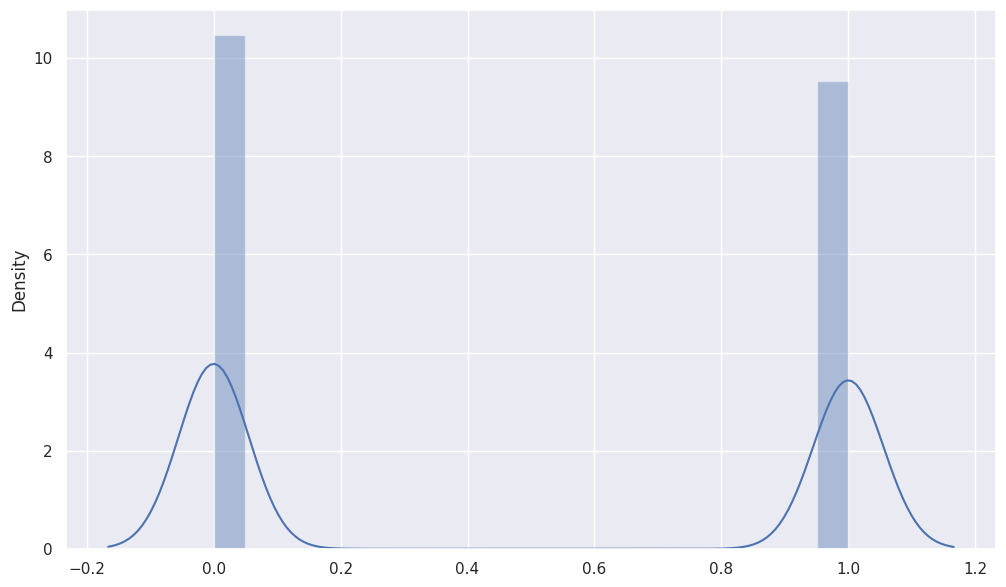

In [ ]:
# Handling Imbalanced Dataset (If needed)
sns.distplot(x=df["recommended"])
plt.show()

What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Distribution plot used for checking distrubution of the target variable.

Data is well distributed no need to balance

## ***6. ML Model Implementation***

### ML Model - 1
##**Logistic Regression**


In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
#Logistic regression:

from sklearn.linear_model import LogisticRegression


Log_reg=LogisticRegression(max_iter=10000)
Log_reg.fit(X_train,y_train)
score=Log_reg.score(X_test,y_test)
print(f'Logistic regression score : {score}')

#Log_reg= LogisticRegression()
#Log_reg.fit(X_train, y_train)


Logistic regression score : 0.9564126160796452


In [ ]:
#creating function to store evolution matrics value
def evaluation_metric(model,y_test,pred_value,metric_df):
  metric_df=metric_df.append({'Model':model,
                              'Accuracy':accuracy_score(y_test,pred_value),
                              'Recall':recall_score(y_test,pred_value),
                              'Precision':precision_score(y_test,pred_value),
                              'f1_score':f1_score(y_test,pred_value),
                              'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6277
         1.0       0.95      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.64%



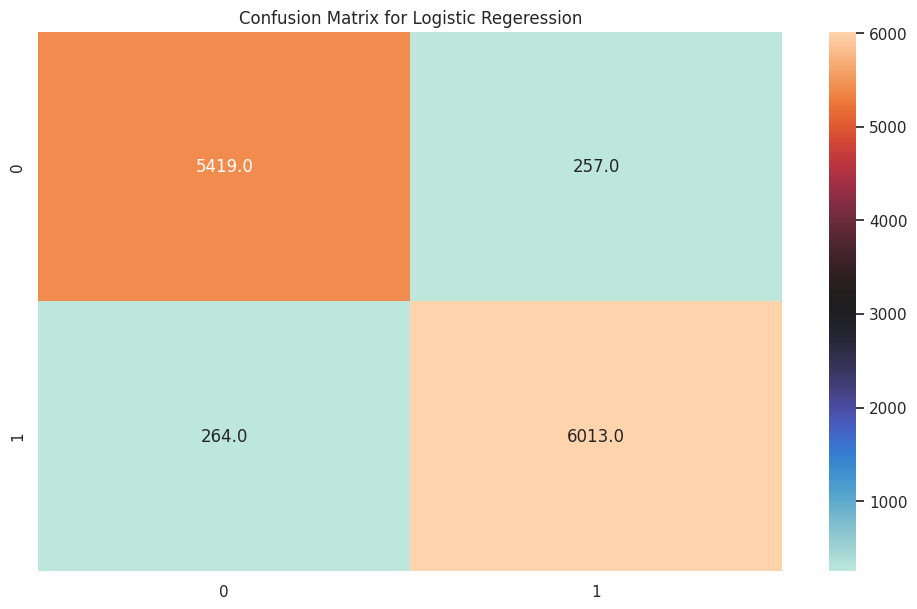

In [ ]:
# Visualizing evaluation Metric Score chart
# Model evaluation
pred_value = Log_reg.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Logistic Regeression')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Logistic Regression',y_test,pred_value,evaluation_metrics_df)


### ML Model - 2
##**Random Forest**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
Rand_for =RandomForestClassifier()
Rand_for.fit(X_train,y_train)
score=Rand_for.score(X_test,y_test)
print(f'Random Forest score : {score}')

Random Forest score : 0.956914582113277


              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      6277
         1.0       0.96      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.69%



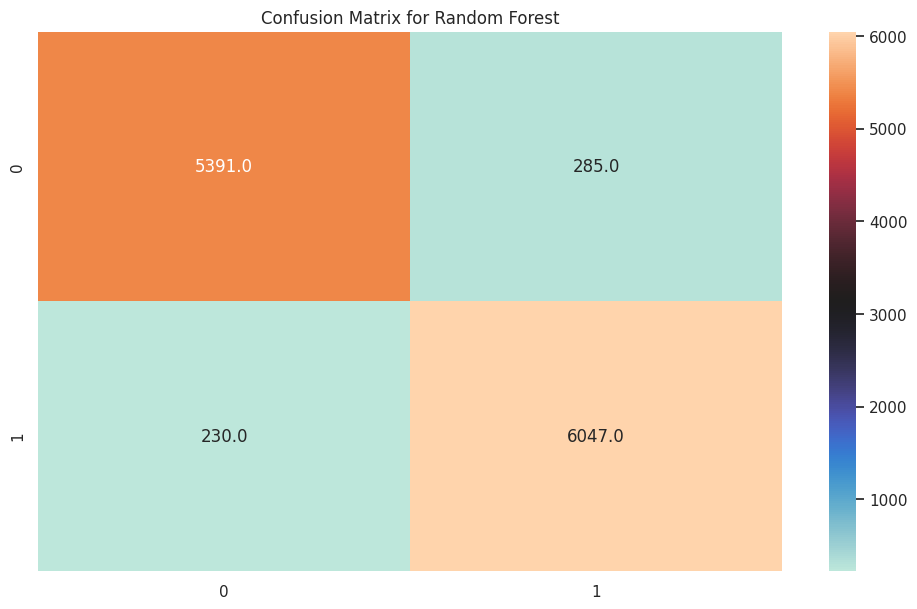

In [ ]:
# Visualizing evaluation Metric Score chart

pred_value = Rand_for.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Random Forest')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Random Forest',y_test,pred_value,evaluation_metrics_df)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##**Random Forest with GridSearchCV**

#Hyperparametric Tuning to get best parameter for evaluation

param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [ ]:
# assigning grid search variable
Rand_for_grid = GridSearchCV(estimator=Rand_for,
                       param_grid = param_dict,
                       cv = 5, verbose=2)



In [ ]:
#Evaluating the optimal parameters

Rand_for_grid.fit(X_train,y_train)
Rand_for_grid.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.5s
[CV] END max_depth=6, min_sa

RandomForestClassifier(max_depth=10, min_samples_leaf=40, min_samples_split=10)

In [ ]:
#getting best parameter from grid search
Rand_for_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
#assigning best param variable
Rand_for_grid_best = Rand_for_grid.best_estimator_

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      6277
         1.0       0.96      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.56%



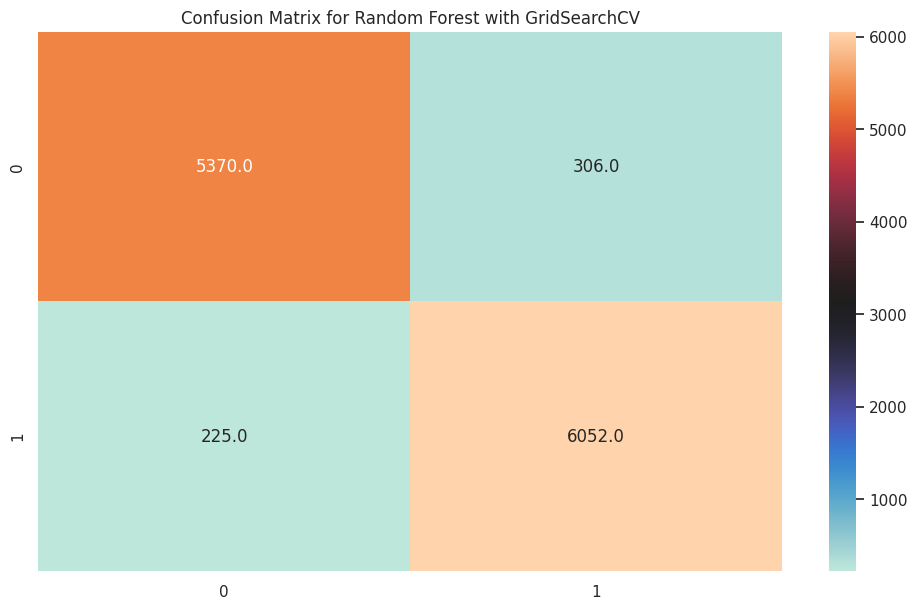

In [ ]:
#model evaluation
pred_value = Rand_for_grid_best.predict(X_test)


print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Random Forest with GridSearchCV')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Random Forest with GridSearchCV',y_test,pred_value,evaluation_metrics_df)

### ML Model - 3
##**Support Vector Machine**

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#supprt vector machine using kernel as linear

svc= SVC(kernel = 'linear')
svc.fit(X_train,y_train)
score=svc.score(X_test,y_test)
print(f'SVM score : {score}')

SVM score : 0.9568309211076718


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6277
         1.0       0.96      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.68%



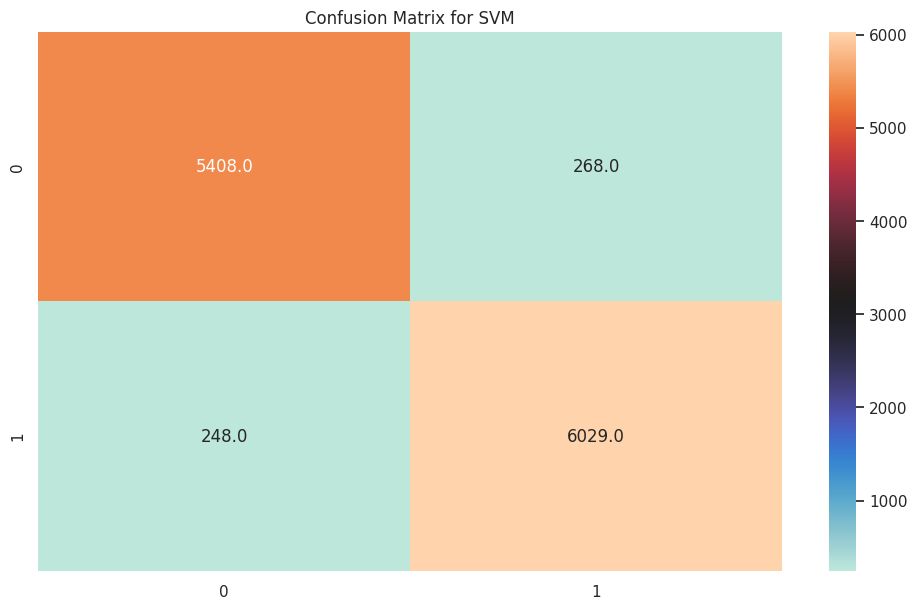

In [ ]:
#model evaluation
pred_value = svc.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for SVM')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('SVM',y_test,pred_value,evaluation_metrics_df)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#getting evaluation metrices
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,f1_score
0,Logistic Regression,0.956413,0.954722,0.953546,NaN,0.956332,0.954133
1,Random Forest,0.956915,0.949789,0.959082,NaN,0.956573,0.954413
2,Random Forest with GridSearchCV,0.955576,0.946089,0.959786,NaN,0.955122,0.952888
3,SVM,0.956831,0.952784,0.956153,NaN,0.956637,0.954465


In [ ]:
#reseting index so to have all the model's evaluation metrices starting from 0
evaluation_metrics_df.sort_values('Accuracy',ascending=False)
evaluation_metrics_df=evaluation_metrics_df.reset_index(drop=True)
evaluation_metrics_df

,Model,Accuracy,Recall,Precision,f1-score,roc_auc_score,f1_score
0,Logistic Regression,0.956413,0.954722,0.953546,NaN,0.956332,0.954133
1,Random Forest,0.956915,0.949789,0.959082,NaN,0.956573,0.954413
2,Random Forest with GridSearchCV,0.955576,0.946089,0.959786,NaN,0.955122,0.952888
3,SVM,0.956831,0.952784,0.956153,NaN,0.956637,0.954465


###  Which ML model did you choose from the above created models as your final prediction model and why?

Here we can see that Random Forest model has the high model accuracy with a score of 0.957333, also see that recall, precision, f1-score and roc_auc_score of the Random Forest model give a higher score than others, from which we selected theRandom Forest model for further prediction.

# **Conclusion**

Predicting airline passenger referrals can have numerous advantages for stakeholders. By accurately identifying passengers likely to refer others, airlines can concentrate marketing efforts on these individuals, leading to increased referrals. This is especially beneficial for small and medium-sized carriers, as word-of-mouth recommendations play a crucial role in their growth.

Tailoring marketing strategies to target satisfied customers who are prone to recommending the airline enhances the chances of converting them into enthusiastic brand advocates. This personalized approach fosters stronger relationships and encourages these advocates to spread the word about the airline to their social circles.

Embracing passenger referrals as a cost-effective marketing strategy is particularly advantageous for budget-constrained smaller airlines. Rather than investing in broad advertising campaigns, they can nurture relationships with high-probability referrers, harnessing the potential of organic growth through word-of-mouth promotions.

Furthermore, the ability to predict passenger referrals allows airlines to enhance customer loyalty and engagement. Recognizing individuals likely to refer others enables airlines to implement loyalty programs and incentives, strengthening the bond between the airline and its customers. Such initiatives also create a sense of community among passengers who share positive experiences with others.

To delve into the exploratory data analysis (EDA), it was found that the A320 aircraft was the most frequently used, with 61% of passengers preferring economy class. British Airways emerged as the most preferred airline, followed closely by China Southern Airlines.

The data also revealed passenger preferences for different classes, with Economy Class being the most preferred and recommended, followed by Business Class and Premium Economy. First Class was the least preferred option.

Among the analyzed airlines, Tarom Romanian stood out for having the best price-quality ratio, while Airbaltic had the least favorable ratio.

The crucial features for predicting passenger recommendations were the overall rating and the value for money. These features played a significant role in a model's ability to predict whether a passenger would recommend a specific airline to their friends.

Several classification models were employed, including Logistic Regression, Random Forest with hyperparameter tuning, and Support Vector Machine (SVM). The Random Forest model demonstrated the highest accuracy (0.957333) and outperformed others in terms of recall, precision, f1-score, and roc_auc_score. Consequently, the Random Forest model was chosen for further prediction purposes.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***